# Training

## Introduction
The structure of the file is the following:
1. Importing the files and the metadata
2. Dimensionality reduction
3. Feature selection
4. Unsupervised learning
    * K-means clustering
    * Hierarchical clustering
5. Supervised learning
    * XGBoost
    * KNN
    * Logistic regression
    * Random forest
    * Support vector machine
    * Neural network
    * Pipeline for model comparison

We start by checking that the necessary libraries are installed

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install scipy
!pip install xgboost
!pip install umap-learn

Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict, validation_curve, learning_curve
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import umap.umap_ as umap
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import scanpy as sc
from scipy.stats import mannwhitneyu
import pickle

# 1. Importing the files and metadata

We start by importing the dataset we will use for the training part of the analysis

In [2]:
tumor = 'HCC1806'

In [3]:
df_smartseq_pathHFiltNorm = '../ai_lab/SmartSeq/HCC1806_SmartS_Filtered_Normalised_3000_Data_train.txt'
df_smartseq_HFiltNorm = pd.read_csv(df_smartseq_pathHFiltNorm, delimiter=' ')

In [4]:
df_dropseq_pathHFiltNorm = '../ai_lab/DropSeq/HCC1806_Filtered_Normalised_3000_Data_train.txt'
df_dropseq_HFiltNorm = pd.read_csv(df_dropseq_pathHFiltNorm, delimiter=' ')

We take a look at the structure of this dataset

In [5]:
df_smartseq_HFiltNorm.head()

,output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate1G1_Hypoxia_S102_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate1G2_Hypoxia_S2_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate1G3_Hypoxia_S7_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate1G4_Hypoxia_S107_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate1G7_Normoxia_S118_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate1G8_Normoxia_S19_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate1G9_Normoxia_S121_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate1H1_Hypoxia_S103_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate1H2_Hypoxia_S3_Aligned.sortedByCoord.out.bam,...,output.STAR.PCRPlate4G12_Normoxia_S243_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate4G1_Hypoxia_S193_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate4G2_Hypoxia_S198_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate4G6_Hypoxia_S232_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate4G7_Normoxia_S204_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate4H10_Normoxia_S210_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate4H11_Normoxia_S214_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.sortedByCoord.out.bam
DDIT4,0,8739,13098,2880,7777,208,750,127,10313,13523,...,341,5545,5757,8337,2579,79,167,10186,238,60
ANGPTL4,48,2101,14032,356,5661,0,0,0,850,10110,...,10,2085,698,2383,65,5,1,3147,41,0
CALML5,0,55,0,0,4383,1902,0,0,0,0,...,0,1587,0,0,0,0,0,0,2867,0
KRT14,321,96,0,6211,0,0,5050,462,2127,0,...,0,0,3077,529,156,2098,27,149,814,7
CCNB1,298,1824,1616,3,145,378,66,58,605,1444,...,204,26,50,588,411,554,3585,1012,2207,477


In [6]:
df_dropseq_HFiltNorm.head()

,AAAAAACCCGGC_Normoxia,AAAACCGGATGC_Normoxia,AAAACGAGCTAG_Normoxia,AAAACTTCCCCG_Normoxia,AAAAGCCTACCC_Normoxia,AAACACAAATCT_Normoxia,AAACCAAGCCCA_Normoxia,AAACCATGCACT_Normoxia,AAACCTCCGGCT_Normoxia,AAACGCCGGTCC_Normoxia,...,TTTTCTGATGGT_Hypoxia,TTTTGATTCAGA_Hypoxia,TTTTGCAACTGA_Hypoxia,TTTTGCCGGGCC_Hypoxia,TTTTGTTAGCCT_Hypoxia,TTTTTACCAATC_Hypoxia,TTTTTCCGTGCA_Hypoxia,TTTTTGCCTGGG_Hypoxia,TTTTTGTAACAG_Hypoxia,TTTTTTTGAATC_Hypoxia
H1-5,2,2,5,1,0,0,0,0,1,0,...,0,1,0,2,1,0,0,0,3,1
MALAT1,3,3,2,3,12,3,1,2,0,0,...,3,1,1,1,4,0,4,1,3,6
MT-RNR2,0,0,0,0,0,0,0,0,0,1,...,1,2,2,2,0,0,1,0,1,0
ARVCF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BCYRN1,0,1,1,0,0,1,1,2,0,3,...,1,1,0,1,1,0,0,1,0,0


We then take the transpose in order to have cells as rows and features as columns and then look at the structure.

In [7]:
df_smartseq_HFiltNormT = df_smartseq_HFiltNorm.T
df_smartseq_HFiltNormT.head()

,DDIT4,ANGPTL4,CALML5,KRT14,CCNB1,IGFBP3,AKR1C2,KRT6A,NDRG1,KRT4,...,MST1R,ZYG11A,NRG1,RBMS3,VCPIP1,LINC02693,OR8B9P,NEAT1,ZDHHC23,ODAD2
output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam,0,48,0,321,298,82,6250,634,0,0,...,78,10,136,0,0,29,0,29,0,0
output.STAR.PCRPlate1G1_Hypoxia_S102_Aligned.sortedByCoord.out.bam,8739,2101,55,96,1824,1938,62,0,522,413,...,279,0,264,0,134,68,0,213,0,0
output.STAR.PCRPlate1G2_Hypoxia_S2_Aligned.sortedByCoord.out.bam,13098,14032,0,0,1616,247,430,907,348,0,...,311,0,38,0,0,0,0,92,0,0
output.STAR.PCRPlate1G3_Hypoxia_S7_Aligned.sortedByCoord.out.bam,2880,356,0,6211,3,3430,79,1953,592,176,...,125,0,16,0,4,1,0,1,0,0
output.STAR.PCRPlate1G4_Hypoxia_S107_Aligned.sortedByCoord.out.bam,7777,5661,4383,0,145,4618,246,85,206,0,...,268,1,25,0,0,0,0,128,0,0


In [8]:
df_dropseq_HFiltNormT = df_dropseq_HFiltNorm.T
df_dropseq_HFiltNormT.head()

,H1-5,MALAT1,MT-RNR2,ARVCF,BCYRN1,ATXN7L2,IGFBP3,H1-3,CTIF,RNF123,...,BATF3,CDKN3,DLD,PMPCA,ZNF165,SCCPDH,NTAN1,CLIP2,DUSP23,ZNF682
AAAAAACCCGGC_Normoxia,2,3,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
AAAACCGGATGC_Normoxia,2,3,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAAACGAGCTAG_Normoxia,5,2,0,0,1,0,1,3,0,0,...,0,0,0,0,0,0,0,0,0,0
AAAACTTCCCCG_Normoxia,1,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAAAGCCTACCC_Normoxia,0,12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now we import the metadata and add the target variable to the dataset.

In [9]:
df_metaH_path = '../ai_lab/SmartSeq/HCC1806_SmartS_MetaData.tsv'
df_metaH = pd.read_csv(df_metaH_path, delimiter='\t')
df_metaH.set_index('Filename', inplace=True)

We define functions to add the target variable for each type of sequencing, which have to be different due to the availability of metadata.

In [10]:
def row_target(row):
    if 'Normoxia' in row.name:
        return 1
    else:
        return 0

def add_target_column_dropseq(dataframe):
    dataframe['Target'] = dataframe.apply(row_target, axis=1)
    return dataframe

In [11]:
def add_target_column_smartseq(data, metadata_path, target_column_name, target_category):
    df_meta = pd.read_csv(metadata_path, delimiter='\t')
    df_meta.set_index('Filename', inplace=True)
    merged_transition = pd.merge(data, df_meta[target_column_name], left_index=True, right_index=True)
    dummy_variables = pd.get_dummies(merged_transition[target_column_name], prefix='category').astype('int')
    
    # Set the target category to 1 and the others to 0
    dummy_variables['Target'] = dummy_variables[target_category]
    dummy_variables.drop(columns=[col for col in dummy_variables.columns if col != 'Target'], inplace=True)
    
    merged_data = pd.concat([merged_transition, dummy_variables], axis=1)
    merged_data.drop(columns=[target_column_name], inplace=True)
    print
    return merged_data

In [12]:
merged_smartseq = add_target_column_smartseq(df_smartseq_HFiltNormT, df_metaH_path, 'Condition', 'category_Normo')

In [13]:
merged_dropseq = add_target_column_dropseq(df_dropseq_HFiltNormT)

We can see that the last column of the dataset is the target one. The information is encoded as 1 in the case of Normoxia, 0 in the case of Hypoxia.

In [14]:
merged_smartseq.head()

,DDIT4,ANGPTL4,CALML5,KRT14,CCNB1,IGFBP3,AKR1C2,KRT6A,NDRG1,KRT4,...,ZYG11A,NRG1,RBMS3,VCPIP1,LINC02693,OR8B9P,NEAT1,ZDHHC23,ODAD2,Target
output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam,0,48,0,321,298,82,6250,634,0,0,...,10,136,0,0,29,0,29,0,0,1
output.STAR.PCRPlate1G1_Hypoxia_S102_Aligned.sortedByCoord.out.bam,8739,2101,55,96,1824,1938,62,0,522,413,...,0,264,0,134,68,0,213,0,0,0
output.STAR.PCRPlate1G2_Hypoxia_S2_Aligned.sortedByCoord.out.bam,13098,14032,0,0,1616,247,430,907,348,0,...,0,38,0,0,0,0,92,0,0,0
output.STAR.PCRPlate1G3_Hypoxia_S7_Aligned.sortedByCoord.out.bam,2880,356,0,6211,3,3430,79,1953,592,176,...,0,16,0,4,1,0,1,0,0,0
output.STAR.PCRPlate1G4_Hypoxia_S107_Aligned.sortedByCoord.out.bam,7777,5661,4383,0,145,4618,246,85,206,0,...,1,25,0,0,0,0,128,0,0,0


In [15]:
merged_dropseq.head()

,H1-5,MALAT1,MT-RNR2,ARVCF,BCYRN1,ATXN7L2,IGFBP3,H1-3,CTIF,RNF123,...,CDKN3,DLD,PMPCA,ZNF165,SCCPDH,NTAN1,CLIP2,DUSP23,ZNF682,Target
AAAAAACCCGGC_Normoxia,2,3,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,1
AAAACCGGATGC_Normoxia,2,3,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
AAAACGAGCTAG_Normoxia,5,2,0,0,1,0,1,3,0,0,...,0,0,0,0,0,0,0,0,0,1
AAAACTTCCCCG_Normoxia,1,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
AAAAGCCTACCC_Normoxia,0,12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# 2. Dimensionality reduction

In this section we try two different dimensionality reduction techniques. This can be useful in case some of our models take a long time to train or to infer with high dimensional data.

First, we use Principal Component Analysis. We project the data on lower dimensional subspaces and find the lowest dimensional projection which can explain 95% of the variance of the dataset.

In [16]:
# in order to speed up the process, we can simply import the datasets from our stored pickle files:
with open(f"pickle/{tumor}/dataset_smartseq", 'rb') as f:
    dataset_smartseq = pickle.load(f)
with open(f"pickle/{tumor}/dataset_dropseq", 'rb') as f:
    dataset_dropseq = pickle.load(f)

### Principal component analysis

In [17]:
def pca_dr(dataset):
    # we rescale the data for the dimensionality reduction
    df_dim_red = pd.DataFrame(StandardScaler().fit_transform(dataset), columns=dataset.columns, index=dataset.index)
    pca = PCA()
    pca_array = pca.fit_transform(df_dim_red)
    pca_array_df = pd.DataFrame(pca_array, columns=[f'PC{i+1}' for i in range(pca_array.shape[1])], index=df_dim_red.index)
    cumsum = np.cumsum(pca.explained_variance_ratio_)
    plt.plot(cumsum)
    nec_dimensions = np.argmax(cumsum >= 0.95)
    plt.scatter(nec_dimensions, 0.95, color='red')
    plt.plot([nec_dimensions, nec_dimensions], [0, 0.95], linestyle='--', color='black')
    plt.plot([0, nec_dimensions], [0.95, 0.95], linestyle='--', color='black')
    print(f"The number of dimensions needed to explain 95% of the variance is {nec_dimensions}")
    pca_array_df = pca_array_df[[f'PC{i+1}' for i in range(nec_dimensions)]]
    return pca_array_df, nec_dimensions

The number of dimensions needed to explain 95% of the variance is 156


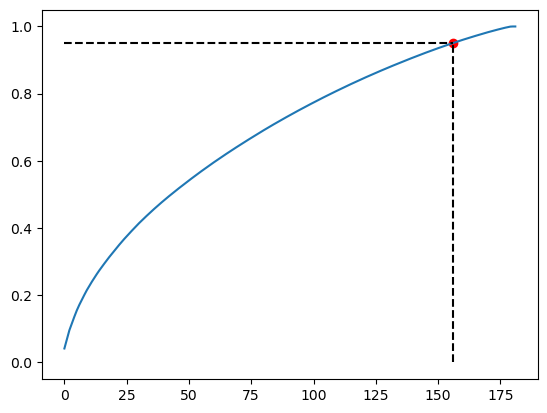

In [18]:
smartseq_pca, smartseq_dimensions = pca_dr(df_smartseq_HFiltNormT)

In [19]:
smartseq_pca = add_target_column_smartseq(smartseq_pca, df_metaH_path, 'Condition', 'category_Normo')

The number of dimensions needed to explain 95% of the variance is 2591


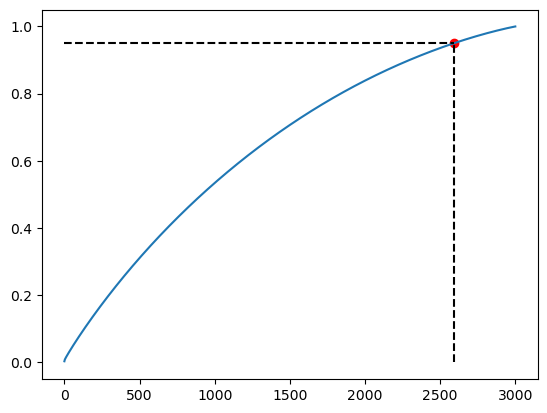

In [20]:
dropseq_pca, dropseq_dimensions = pca_dr(df_dropseq_HFiltNormT)

In [21]:
dropseq_pca = add_target_column_dropseq(dropseq_pca)

### UMAP (Uniform Manifold Approximation and Projection).

In [22]:
def umap_dr(dataset, dropseq=False):
    # now, we use umap. since it's harder to estimate the explained variance, we use a heuristic: the number of components will be the same as in PCA
    df_dim_red = pd.DataFrame(StandardScaler().fit_transform(dataset), columns=dataset.columns, index=dataset.index)
    if dropseq:
        nec_dimensions = dropseq_dimensions
    else:
        nec_dimensions = smartseq_dimensions
    reducer = umap.UMAP(n_components=nec_dimensions, n_neighbors=50) #qualitatively, 50 neighbors seemed to work well for out scope
    embedding = reducer.fit_transform(df_dim_red)
    columns = [f'UMAP{i+1}' for i in range(embedding.shape[1])]
    umap_embedding_df = pd.DataFrame(embedding, columns=columns, index=df_dim_red.index)
    
    return umap_embedding_df

In [23]:
smartseq_umap = umap_dr(df_smartseq_HFiltNormT, False)

In [24]:
smartseq_umap = add_target_column_smartseq(smartseq_umap, df_metaH_path, 'Condition', 'category_Normo')

In [25]:
smartseq_umap.head()

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5,UMAP6,UMAP7,UMAP8,UMAP9,UMAP10,...,UMAP148,UMAP149,UMAP150,UMAP151,UMAP152,UMAP153,UMAP154,UMAP155,UMAP156,Target
output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam,5.894997,2.728561,5.611271,5.809087,3.411819,7.036254,6.577419,3.804001,4.582727,5.701517,...,5.712855,5.537724,5.546493,5.303671,4.386364,6.258829,4.555430,4.699828,4.638190,1
output.STAR.PCRPlate1G1_Hypoxia_S102_Aligned.sortedByCoord.out.bam,6.071755,2.651967,5.728893,5.821358,3.743875,6.910526,6.685738,3.714287,4.644002,5.654821,...,5.553349,5.362487,5.585916,5.242325,4.303008,6.309210,4.453886,4.640076,4.625130,0
output.STAR.PCRPlate1G2_Hypoxia_S2_Aligned.sortedByCoord.out.bam,6.053096,2.487662,5.734388,5.830602,3.678241,6.913577,6.620927,3.800413,4.739545,5.634825,...,5.558706,5.307073,5.599371,5.065928,4.331142,6.284348,4.452941,4.581268,4.564964,0
output.STAR.PCRPlate1G3_Hypoxia_S7_Aligned.sortedByCoord.out.bam,6.065960,2.488632,5.706896,5.837053,3.514648,6.949861,6.529079,3.922741,4.576164,5.740307,...,5.621840,5.400390,5.525789,4.976333,4.393126,6.195553,4.464597,4.618681,4.626747,0
output.STAR.PCRPlate1G4_Hypoxia_S107_Aligned.sortedByCoord.out.bam,6.118612,2.587229,5.771971,5.964321,3.703320,6.770904,6.514608,3.788990,4.498518,5.701656,...,5.656910,5.516683,5.511175,5.104492,4.426233,6.202559,4.424618,4.462108,4.496566,0


In [26]:
dropseq_umap = umap_dr(df_dropseq_HFiltNormT, True)

In [27]:
dropseq_umap = add_target_column_dropseq(dropseq_umap)

In [28]:
dropseq_umap.head()

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5,UMAP6,UMAP7,UMAP8,UMAP9,UMAP10,...,UMAP2583,UMAP2584,UMAP2585,UMAP2586,UMAP2587,UMAP2588,UMAP2589,UMAP2590,UMAP2591,Target
AAAAAACCCGGC_Normoxia,9.693315,9.791260,9.909691,9.840213,9.476154,9.566671,9.394881,9.014599,8.552502,6.103820,...,3.004021,4.243618,4.343913,5.310376,5.152863,4.681806,5.165843,6.372994,6.833431,1
AAAACCGGATGC_Normoxia,9.704316,9.806192,9.891473,9.841936,9.469251,9.554841,9.394596,8.998403,8.562373,6.085433,...,3.007520,4.248073,4.355291,5.313121,5.147542,4.687669,5.175709,6.377450,6.834414,1
AAAACGAGCTAG_Normoxia,9.748199,9.851096,9.829718,9.841336,9.449745,9.493301,9.411414,8.949285,8.575126,6.039051,...,3.025116,4.254817,4.362821,5.330805,5.135958,4.664923,5.181791,6.381836,6.832817,1
AAAACTTCCCCG_Normoxia,9.702276,9.793723,9.916029,9.842164,9.466000,9.536363,9.401823,9.006119,8.555058,6.068032,...,3.009489,4.247370,4.338947,5.320418,5.157005,4.664206,5.157580,6.370146,6.833062,1
AAAAGCCTACCC_Normoxia,9.690780,9.788961,9.941852,9.835935,9.492606,9.545432,9.404634,9.022451,8.540835,6.114882,...,3.015329,4.267259,4.366492,5.300580,5.196220,4.698745,5.156817,6.352608,6.847656,1


We now create dictionaries containing the datasets for each sequencing type:

In [29]:
dataset_smartseq = {}
dataset_smartseq['merged dataset'] = merged_smartseq
dataset_smartseq['PCA dataset'] = smartseq_pca
dataset_smartseq['UMAP dataset'] = smartseq_umap

In [30]:
dataset_dropseq = {}
dataset_dropseq['merged dataset'] = merged_dropseq
dataset_dropseq['PCA dataset'] = dropseq_pca
dataset_dropseq['UMAP dataset'] = dropseq_umap

We save these datasets because it is computationally expensive to run these

In [31]:
filename = f"pickle/{tumor}/dataset_smartseq"
with open(filename, 'wb') as f:
    pickle.dump(dataset_smartseq, f)

In [32]:
filename = f"pickle/{tumor}/dataset_dropseq"
with open(filename, 'wb') as f:
    pickle.dump(dataset_dropseq, f)

nota: AN GPTL4 PGK1 SONO IMPORTNTI VERMNETE, L HA DETTO LEI

# 3. Feature selection

Another possible approach to reduce the dimensionality of the dataset is to select only the "most significant" features. 

To do so, we will consider as "significant" the genes that are above the CPM threshold (that we will optimize) for at least two samples, and whose q-values, computed as described next, are below 0.05.

In [30]:
def filter_CPM(data, threshold):
    data_filtered = pd.DataFrame()
    # Keep track of the number of rows removed
    removed_genes = 0
    # Create a mask to filter out rows with low counts
    if 'Target' in data.index:
        data = data.drop('Target')
    mask_thr = data > threshold
    mask_rows = mask_thr.sum(axis=1) >= 2
    data_filtered = data.loc[mask_rows, :]
    return data_filtered

Since we have only two groups (Normoxia and Hypoxia), it could be useful to understand the significant genes to run the Wilcoxon Rank-Sum Test too.

In the Mann-Whitney test, the null hypothesis (usually denoted as $H_0$)
states that there are no significant differences between the probability distributions of the two samples, meaning that both samples are drawn from the same population. 

The alternative hypothesis (usually denoted as $H_1$) asserts that there is a significant difference between the distributions of the two samples, suggesting that one sample stochastically dominates the other.

So we run this test for each gene, and we store the corresponding p-values in a dictionary.


In [31]:
def wilcoxon_ranksum_test(data):
    normo = data[data["Target"] == 0]
    hypo = data[data["Target"] == 1]
    p_values = {}
    for i in range(data.shape[1]):
        p_values[data.columns[i]] = mannwhitneyu(normo.iloc[:, i], hypo.iloc[:, i], alternative = "two-sided")[1]
    return p_values

Gene expression analysis involves comparing the expression levels of thousands of genes between different experimental conditions.
 Researchers typically conduct statistical testsfor each gene to determine if there are significant differences in expression between the conditions.

However, when performing thousands of statistical tests simultaneously, there's a high chance of observing false positives (genes incorrectly identified as differentially expressed) due to random chance alone. To address this issue, researchers use multiple testing corrections to control the false discovery rate (FDR).
Here's how q-values come into play: by  Benjamini-Hochberg procedure we adjusts the p-values to account for the number of tests performed and controls the FDR.
By using q-values, we can prioritize genes that are more likely to be truly differentially expressed while minimizing the number of false discoveries. 

In [32]:
def q_value (p_val_dict):
  sorted_list = [[key, value] for (key, value) in sorted(p_val_dict.items(), key=lambda x: x[1])]
  rank = 1
  for p in sorted_list:
    p[1] = p[1] * len(p_val_dict)/rank
    rank += 1
  q_val_dict = dict(sorted_list)
  q_val_dict = (sorted(q_val_dict.items()))
  return q_val_dict

For choosing the optimal number of significant genes, we will combine q-values with CPM threshold.
we will proceed in the following way:
1. We filter the data using the CPM threshold
2. We run the Mann-Whitney test on the remaining features, computing the p-values (and then the q-values) for each gene
3. We keep only the ones with an associated q value >0.05
4. We perform gridsearch to find the optimal value for the threshold

It's clear that an optimal value for the threshold is 30, and by choosing such a value we will keep approximately 428 features

In [33]:
def grid_search_thresholds(data, thresholds, smartseq=True):
    n_features = []
    for threshold in thresholds:
        data_filtered = filter_CPM(data, threshold)
        data_filtered = data_filtered.T
        print("Number of features dropped for CPM", threshold, ":", data.shape[0]-data_filtered.shape[1])
        if smartseq:
            data_filtered = add_target_column_smartseq(data_filtered, df_metaH_path, 'Condition', 'category_Normo')
        else:
            data_filtered = add_target_column_dropseq(data_filtered)
        p_vals = wilcoxon_ranksum_test(data_filtered)
        count = [value for value in q_value(p_vals) if value[1] <= 0.05]
        count = [value[0] for value in count]
        # Delete all columns in count that are not in colsdatafilt
        finaldf = data_filtered[count]
        print("Number of features dropped after q-value test for threshold", threshold, ":", data_filtered.shape[1]-len(count))
        n_features.append(finaldf.shape[1])
        # Plot the number of features we drop for each treshold value
    plt.plot(thresholds, n_features)
    plt.xlabel('Threshold')
    plt.ylabel('Number of features')
    plt.title('Number of significant features for each threshold value')
    plt.axvline(x=30, color = "red", linestyle = "--", label = "Optimal Threshold")
    plt.legend()
    plt.show()  
    return n_features

We can then plot the variance on a scatter plot.

In [34]:
def scatter_plot_variance(dataset, threshold):
    filt_first = filter_CPM(dataset.T, threshold).T
    adata = sc.AnnData(filt_first)

    sc.pp.highly_variable_genes(adata, n_top_genes=200, flavor='seurat_v3')
    # Note since our dataset is already log-transformed as the function 'Expects logarithmized data'
    sc.pl.highly_variable_genes(adata)

In [35]:
def filtering(dataset, threshold):
    datasetT = dataset.T
    filteredcpm = filter_CPM(datasetT, threshold)
    print(filteredcpm)
    print("Number of rows before filtering:", datasetT.shape[0])

    p_values_mannwhitneyu = wilcoxon_ranksum_test(merged_smartseq)

    thresholds = np.linspace(start = 10, stop = 100, num = 10)
    nfeatures = grid_search_thresholds(datasetT, thresholds)

    merged_filtered = filter_CPM(datasetT, 30)
    merged_filtered = merged_filtered.T
    merged_filtered = add_target_column_smartseq(merged_filtered, df_metaH_path, 'Condition', 'category_Normo')
    pvals = wilcoxon_ranksum_test(merged_filtered)
    qvals = q_value(pvals)
    count = [value for value in qvals if value[1] <= 0.05]
    count = [value[0] for value in count]
    merged_filtered = merged_filtered[count]

    print(merged_filtered.shape)

           output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam  \
DDIT4                                                      0                     
ANGPTL4                                                   48                     
CALML5                                                     0                     
KRT14                                                    321                     
CCNB1                                                    298                     
...                                                      ...                     
VCPIP1                                                     0                     
LINC02693                                                 29                     
NEAT1                                                     29                     
ZDHHC23                                                    0                     
ODAD2                                                      0                     

           outp

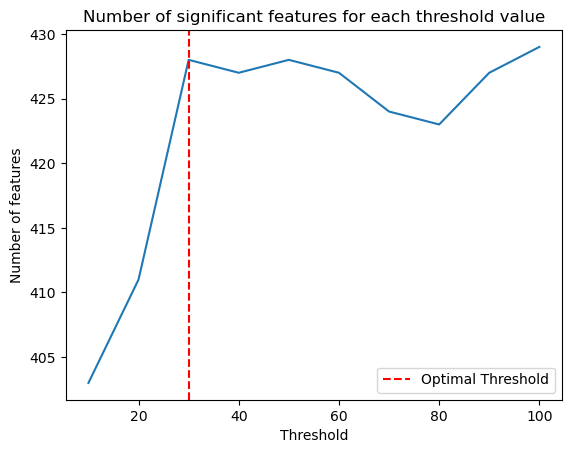

(182, 428)


In [36]:
filtering(df_smartseq_HFiltNormT, 20)

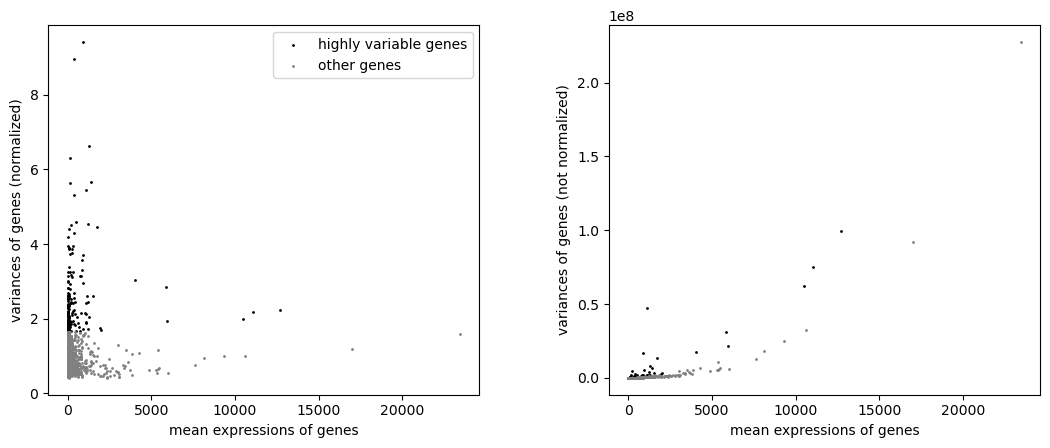

In [37]:
scatter_plot_variance(df_smartseq_HFiltNormT, threshold=30)

# 4. Unsupervised learning
We now prooceed doing clustering.
In particular, we use two different approaches: K means clustering and hierarchical clustering.
As distance we will use the euclidean one.

We start with K means.
In order to visualize this clusters we found in 3D we apply PCA on the dataset.

In [38]:
data_scaled_smartseq = pd.DataFrame(StandardScaler().fit_transform(df_smartseq_HFiltNorm), columns=df_smartseq_HFiltNorm.columns)
data_scaled_dropseq = pd.DataFrame(StandardScaler().fit_transform(df_dropseq_HFiltNorm), columns=df_dropseq_HFiltNorm.columns)

def k_means_clustering(dataset):
    # first, rescale the data
    data_scaled = pd.DataFrame(StandardScaler().fit_transform(dataset), columns=dataset.columns)

    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=2, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    str_labels = [str(label) for label in cluster_labels]
    data_scaled ['c']= cluster_labels

    # Perform PCA to reduce the data to 3 dimensions, so that it can be visualized
    pca = PCA(n_components=3)
    pca_result = pca.fit_transform(data_scaled)

    # Create DataFrame for clustered data
    df_clustered = pd.DataFrame({
        'PC1': pca_result[:, 0],
        'PC2': pca_result[:, 1],
        'PC3': pca_result[:, 2],
        'Cluster': str_labels
    })

    return df_clustered

def plot_clusters(df_clustered):
    fig = px.scatter_3d(df_clustered, x='PC1', y='PC2', z='PC3', color='Cluster',
                        symbol='Cluster', opacity=0.7, size_max=10,
                        title='KMeans Clustering in 3D with PCA')

    fig.show()

In [39]:
k_means_smartseq = k_means_clustering(data_scaled_smartseq )
plot_clusters(k_means_smartseq)

In [40]:
k_means_dropseq = k_means_clustering(data_scaled_dropseq)
plot_clusters(k_means_dropseq)

We then do hierarchical clustering using all the 4 linkage methods: ward, complete, avarage and median.

In [41]:
def hierarchical_clustering(dataset):
    # Define linkage methods
    methods = ['ward', 'complete', 'average', 'median']

    # first, rescale the data
    data_scaled = pd.DataFrame(StandardScaler().fit_transform(dataset), columns=dataset.columns)

    # Perform PCA to reduce the data to 3 dimensions, so that it can be visualized
    pca = PCA(n_components=3)
    pca_result = pca.fit_transform(data_scaled)

    # Plot dendrograms for each linkage method
    plt.figure(figsize=(15, 10))
    for i, method in enumerate(methods, 1):
        plt.subplot(2, 2, i)
        linked = linkage(pca_result, method=method)
        dendrogram(linked, distance_sort='descending', truncate_mode='level', p=5)
        plt.title(f'Hierarchical Clustering Dendrogram ({method.capitalize()} Linkage)')
        plt.xlabel('Data points')
        plt.ylabel('Distance')

    
    plt.tight_layout()
    plt.show()

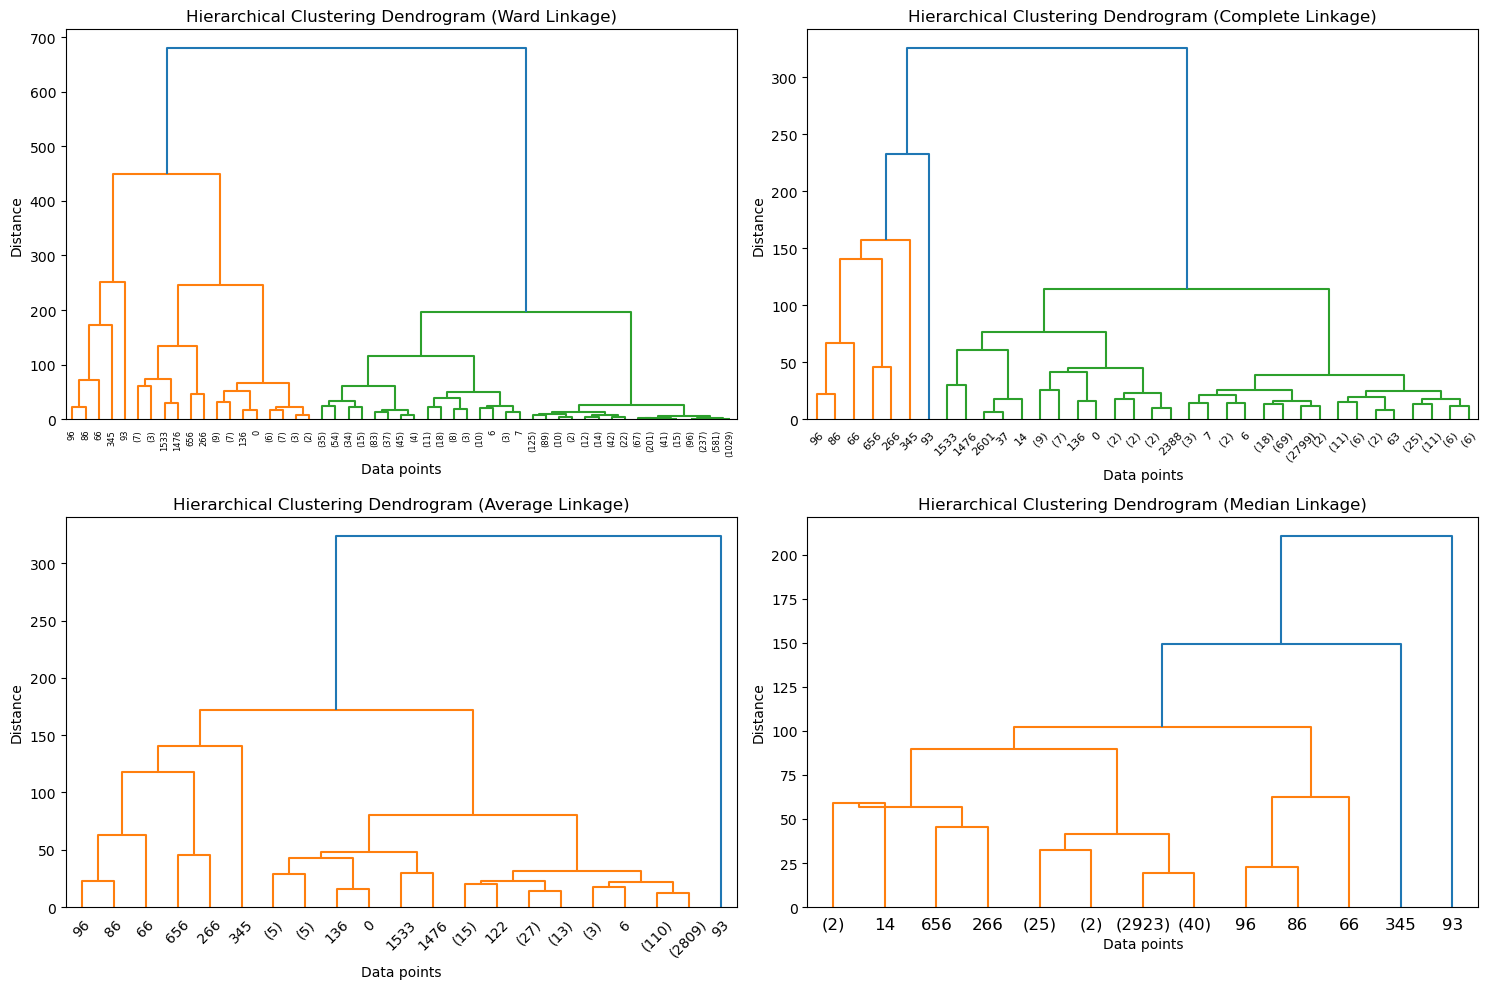

In [42]:
hierarchical_clustering(data_scaled_smartseq)

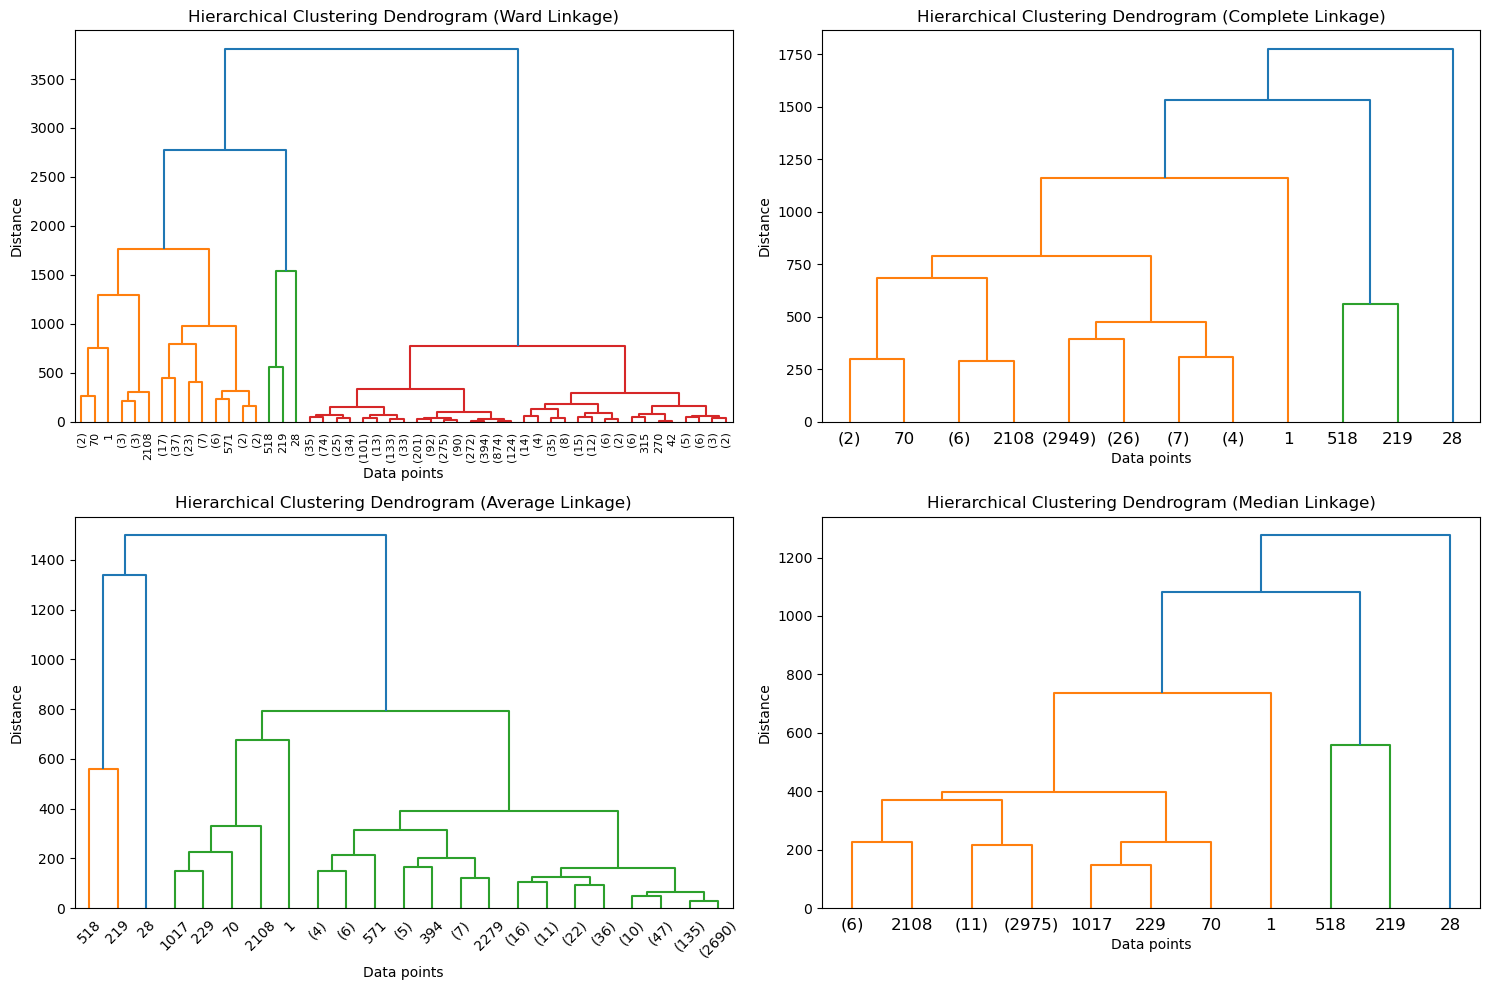

In [43]:
hierarchical_clustering(data_scaled_dropseq)

In this section we implement supervised learing algorithms.
For this aim we define X as all the features except the 'Target' column and Y as the 'Target' column.
Then we select a subset of this two for training (X_train and Y_train) and another for testing(X_test and Y_test).
Finally, we set up a K-Fold cross-validation iterator

# 5. Supervised learning

For every model, we will define a function that will train it given the dataset. These functions will then keep track of the model, its parameters and metrics.

We define some auxilliary functions.

In [17]:
def load_dataset(dataset):
    X = dataset.drop(columns=['Target'])
    y = dataset['Target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
    kfold = KFold(n_splits=5, shuffle=True, random_state=123)
    return X, y, X_train, X_test, y_train, y_test, kfold

In [18]:
def plot_confusion_matrix(model, name):
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(model['confusion_matrix'], annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

### XGBoost

In [35]:
def run_xgboost(dataset):
    X, y, X_train, X_test, y_train, y_test, kfold = load_dataset(dataset)
    retval = {}
    retval['dataset'] = dataset
    retval['name'] = 'XGboost'

    # Define the parameter grid
    param_grid = {
        'max_depth': range(3, 10),
        'learning_rate': np.linspace(0.1, 1, 10),
        'n_estimators': range(10, 110, 10),
        'gamma': np.linspace(0, 0.5, 5),
        'subsample': np.linspace(0.5, 1, 6),
        'colsample_bytree': np.linspace(0.5, 1, 6),
        'min_child_weight': range(1, 6),
        'scale_pos_weight': range(1, 6)
    }

    xg_cl = XGBClassifier()


    # Instantiate RandomizedSearchCV
    random_search = RandomizedSearchCV(xg_cl, param_distributions=param_grid, n_iter=50, scoring='accuracy',
                                        n_jobs=-1, cv=kfold, random_state=123)

    # Fit the model
    random_search.fit(X, y)

    # Print/return the best parameters
    retval['parameters'] = random_search.best_params_

    #Now we implement the best model
    xgb_optm = xgb.XGBClassifier(objective='binary:logistic', **random_search.best_params_)
    
    # Train the model
    xgb_optm.fit(X_train, y_train)
    retval['model'] = xgb_optm

    # Make predictions on the test set
    xgb_predictions = xgb_optm.predict(X_test)
    retval['predictions'] = xgb_predictions

    # Calculate accuracy
    accuracy = accuracy_score(y_test, xgb_predictions)
    
    # Perform k-fold cross-validation
    cv_results = cross_val_score(xgb_optm, X, y, cv=kfold, scoring='accuracy')
    retval['accuracy'] = cv_results.mean()

    # Create confusion matrix
    conf_matrix = confusion_matrix(y_test, xgb_predictions)
    retval['confusion_matrix'] = conf_matrix

    #Calculate Precision
    prec = precision_score(y_test, xgb_predictions)
    retval['precision'] = prec

    #Calculate Recall
    rec = recall_score(y_test, xgb_predictions)
    retval['recall'] = rec
    
    #Calculate F1 score
    f1 = f1_score(y_test, xgb_predictions)
    retval['f1'] = f1

    #Calculate AUC
    auc = roc_auc_score(y_test, xgb_predictions)
    retval['auc'] = auc

    return retval

Here we define an auxilliary function which we will use only on the xgb model.

In [36]:
def plot_feature_importance(model):
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    xgb.plot_importance(model['model'], max_num_features=200)
    plt.title("Feature Importance")
    plt.show()

We now run the xgb algorithm on our 3 datasets (the complete one, as well as the two with reduced dimensionality), print the accuracy and plot the confusion matrix. Since the training can take a long time, we store the trained models with pickle.

merged dataset
Accuracy: 0.9837837837837838


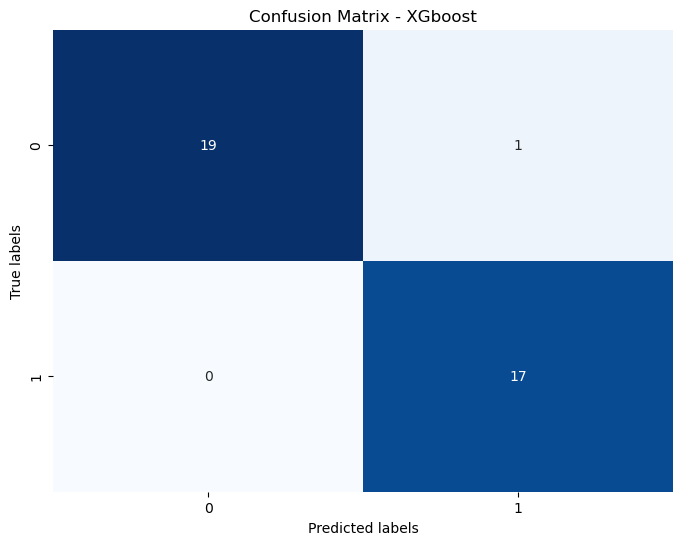

<Figure size 1000x600 with 0 Axes>

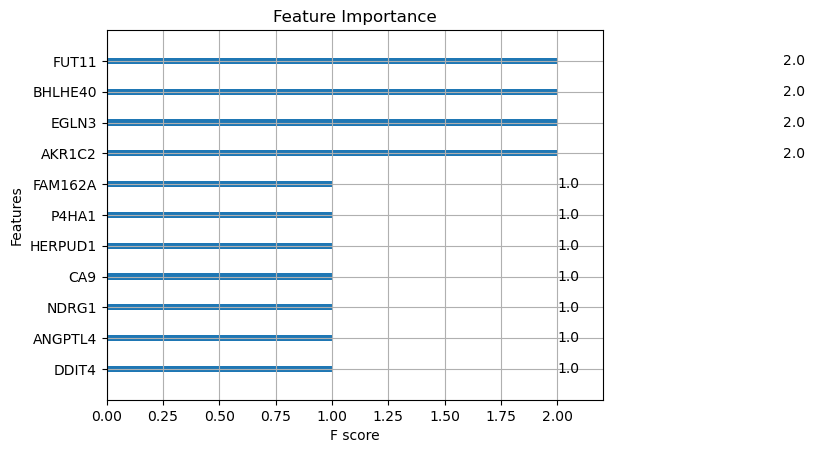

PCA dataset
Accuracy: 0.9016516516516516


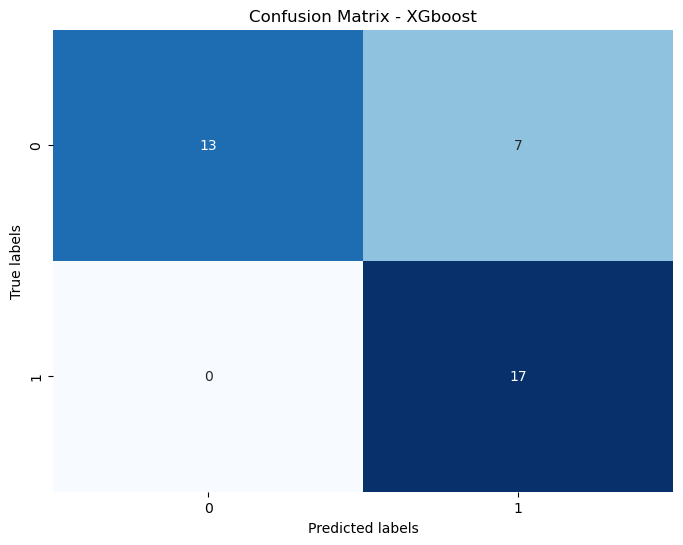

<Figure size 1000x600 with 0 Axes>

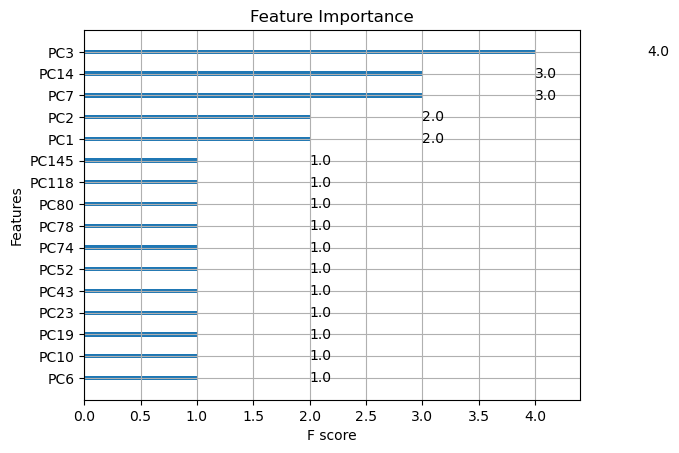

UMAP dataset
Accuracy: 0.944894894894895


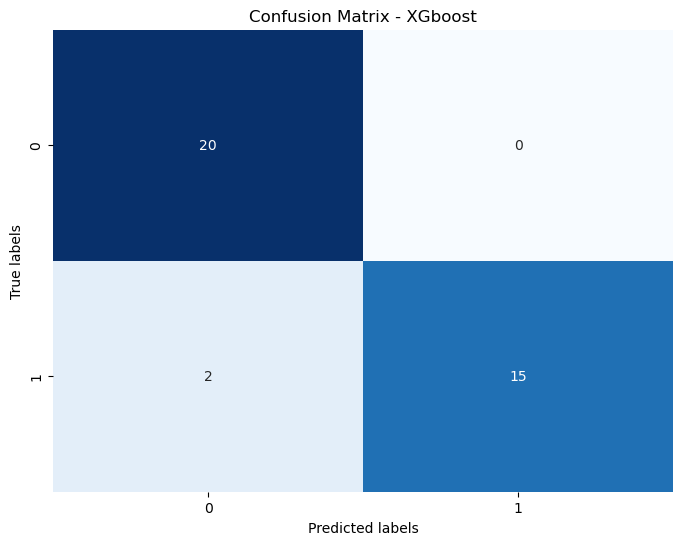

<Figure size 1000x600 with 0 Axes>

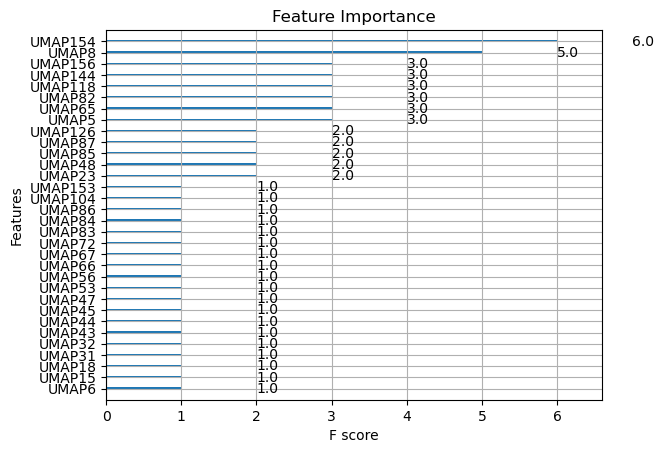

In [37]:
for x in dataset_smartseq.keys():
    print(x)
    xgboost_smartseq = run_xgboost(dataset_smartseq[x])
    # dump the model to save it
    filename = f"pickle/{tumor}/xgboost/smartseq_{x}"
    with open(filename, 'wb') as f:
        pickle.dump(xgboost_smartseq, f)
    print(f"Accuracy: {xgboost_smartseq['accuracy']}")
    plot_confusion_matrix(xgboost_smartseq, xgboost_smartseq['name'])
    plot_feature_importance(xgboost_smartseq)

merged dataset


/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-m

Accuracy: 0.9545700862527241


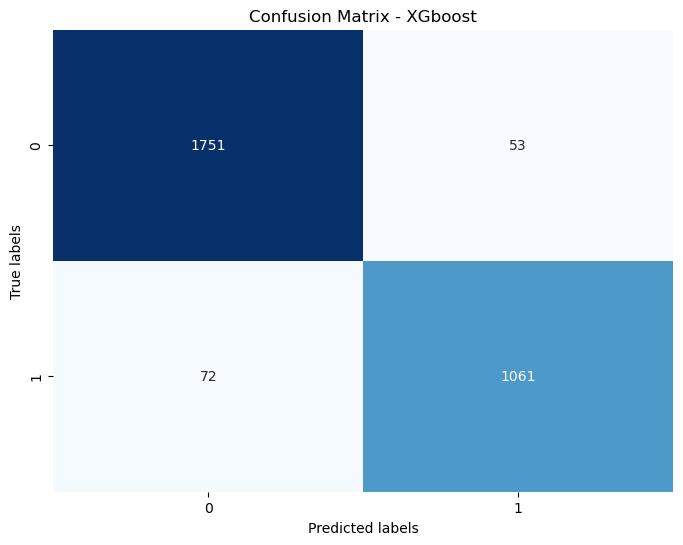

<Figure size 1000x600 with 0 Axes>

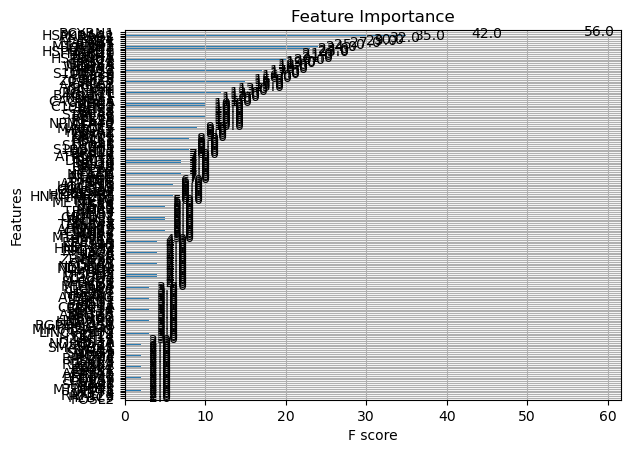

PCA dataset


/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


Accuracy: 0.9813375156209556


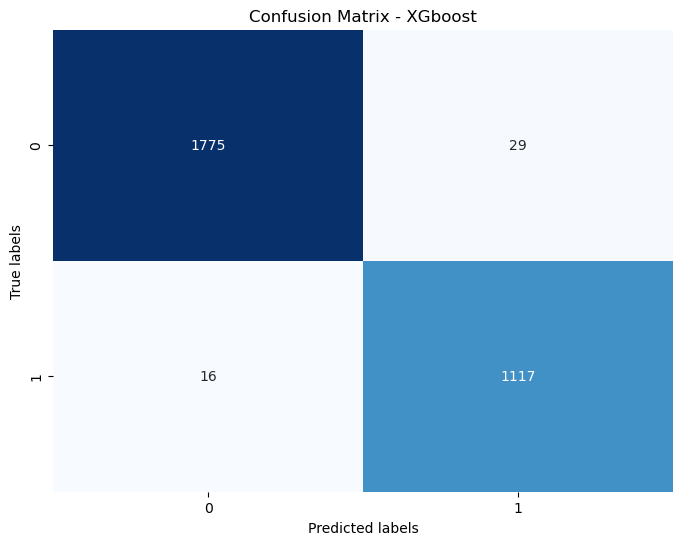

<Figure size 1000x600 with 0 Axes>

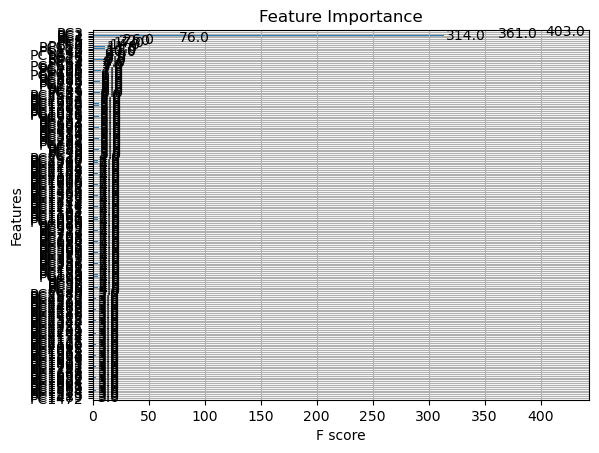

UMAP dataset


/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-m

Accuracy: 0.9195606603338595


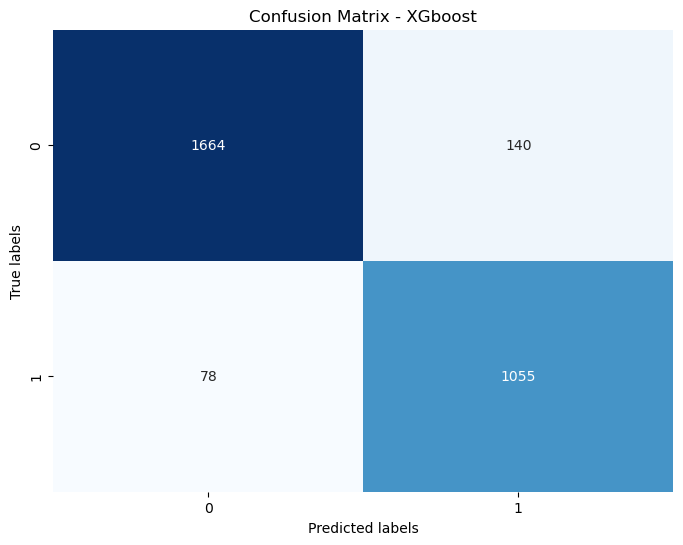

<Figure size 1000x600 with 0 Axes>

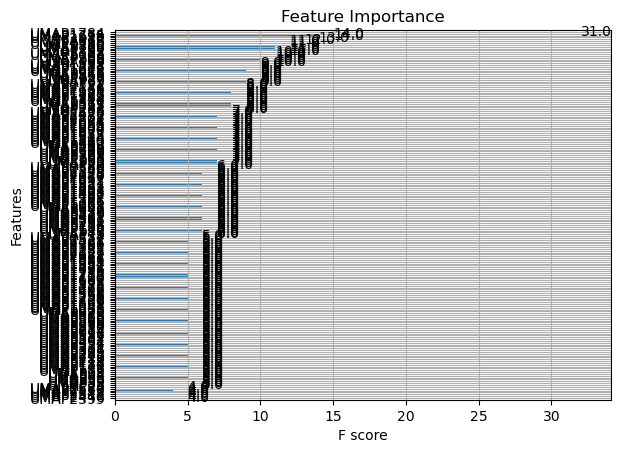

In [38]:
#rerun

for x in dataset_dropseq.keys():
    print(x)
    xgboost_dropseq = run_xgboost(dataset_dropseq[x])
    filename = f"pickle/{tumor}/xgboost/dropseq_{x}"
    with open(filename, 'wb') as f:
        pickle.dump(xgboost_dropseq, f)
    print(f"Accuracy: {xgboost_dropseq['accuracy']}")
    plot_confusion_matrix(xgboost_dropseq, xgboost_dropseq['name'])
    plot_feature_importance(xgboost_dropseq)

### K-Nearest Neighbors (KNN).

In [39]:
def run_kneighbors(dataset):
    X, y, X_train, X_test, y_train, y_test, kfold = load_dataset(dataset)
    retval = {}
    retval['dataset'] = dataset
    retval['name'] = 'KNN'
    
    param_grid = {
        'n_neighbors': range(1, 20),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    }

    knn = KNeighborsClassifier()

    # Instantiate Gridsearch
    grid_search = GridSearchCV(knn, param_grid=param_grid, scoring='accuracy',
                            n_jobs=-1, cv=kfold)

    # Fit the model
    grid_search.fit(X, y)

    # return the best parameters
    retval['parameters'] = grid_search.best_params_

    knn_optm = KNeighborsClassifier(**grid_search.best_params_)

    # Train the KNN classifier
    knn_optm.fit(X_train, y_train)
    retval['model'] = knn_optm

    # Make predictions on the test set
    knn_predictions = knn_optm.predict(X_test)
    retval['predictions'] = knn_predictions

    # Calculate accuracy (actually, we will use the mean accuracy computed with cross validation)
    accuracy = accuracy_score(y_test, knn_predictions)

    # Perform k-fold cross-validation
    cv_results = cross_val_score(knn_optm, X, y, cv=kfold, scoring='accuracy')
    retval['accuracy'] = cv_results.mean()

    # Create confusion matrix
    conf_matrix = confusion_matrix(y_test, knn_predictions)
    retval['confusion_matrix'] = conf_matrix

    #Calculate Precision
    prec = precision_score(y_test, knn_predictions)
    retval['precision'] = prec

    #Calculate Recall
    rec = recall_score(y_test, knn_predictions)
    retval['recall'] = rec
    
    #Calculate F1 score
    f1 = f1_score(y_test, knn_predictions)
    retval['f1'] = f1

    #Calculate AUC
    auc = roc_auc_score(y_test, knn_predictions)
    retval['auc'] = auc

    return retval

Again, we train the model on the 3 datasets and plot the confusion matrices.

merged dataset


/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


Accuracy: 0.9669669669669669


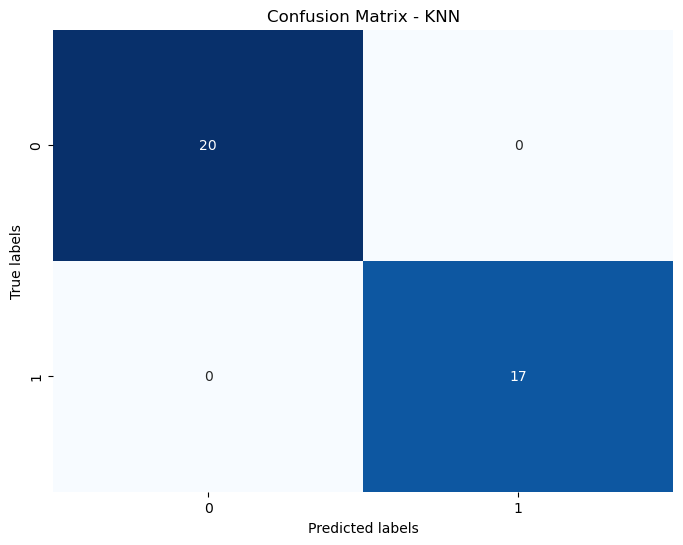

PCA dataset
Accuracy: 0.8243243243243243


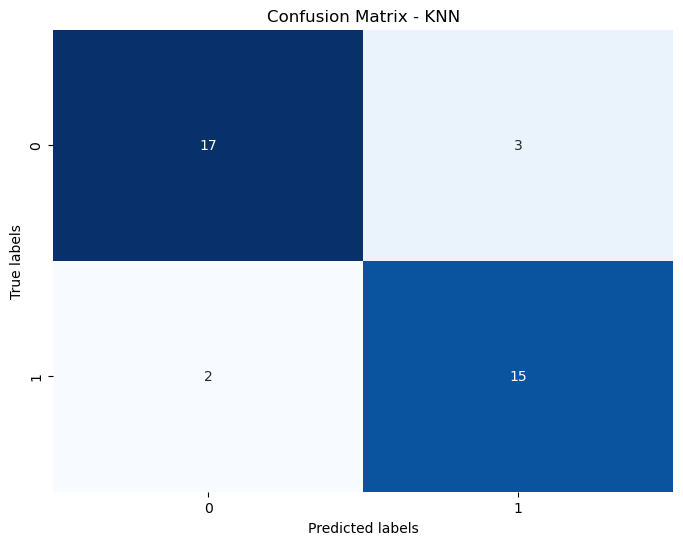

UMAP dataset
Accuracy: 0.9226726726726728


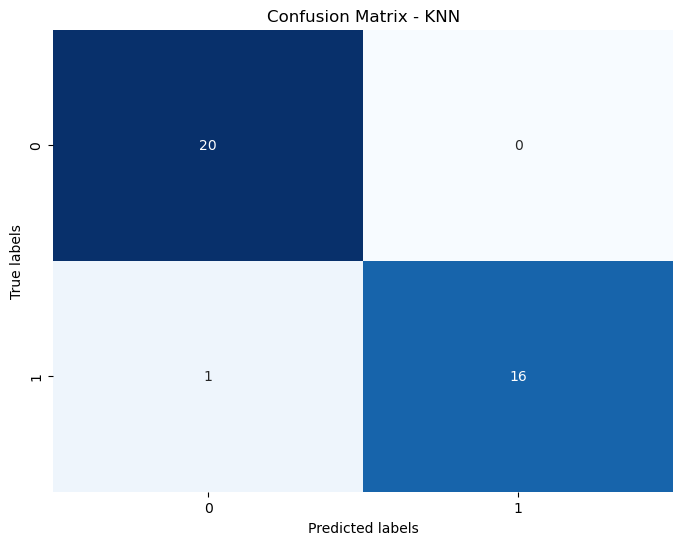

In [40]:
for x in dataset_smartseq.keys():
    print(x)
    kneighbors_smartseq = run_kneighbors(dataset_smartseq[x])
    filename = f"pickle/{tumor}/knn/smartseq_{x}"
    with open(filename, 'wb') as f:
        pickle.dump(kneighbors_smartseq, f)
    print(f"Accuracy: {kneighbors_smartseq['accuracy']}")
    plot_confusion_matrix(kneighbors_smartseq, kneighbors_smartseq['name'])


Text(0.5, 0.92, '3D Scatter plot of two genes')

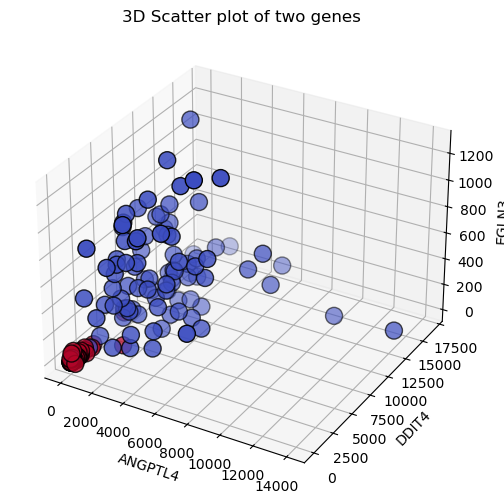

In [41]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
X, y, X_train, X_test, y_train, y_test, kfold = load_dataset(dataset_smartseq['merged dataset'])
scatter = ax.scatter(X['ANGPTL4'], X['DDIT4'], X['EGLN3'], c=y, cmap='coolwarm', edgecolor='k', s=150)

# Set labels and title
ax.set_xlabel('ANGPTL4')
ax.set_ylabel('DDIT4')
ax.set_zlabel('EGLN3')
ax.set_title('3D Scatter plot of two genes')

merged dataset
Accuracy: 0.6762014567497837


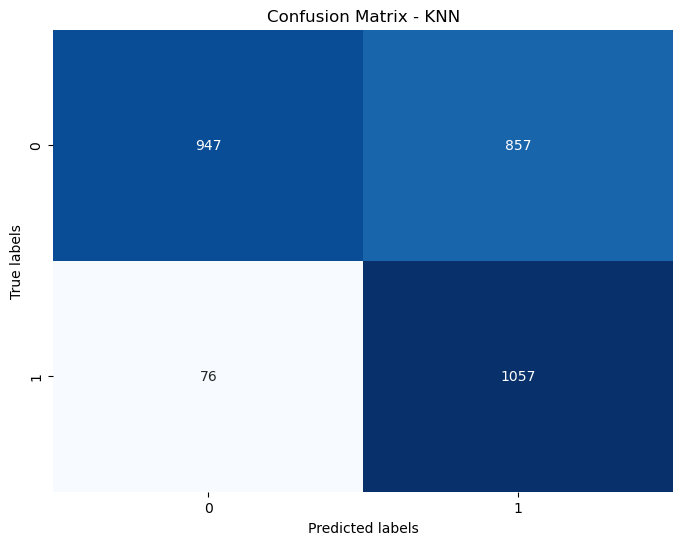

PCA dataset
Accuracy: 0.5474052746180229


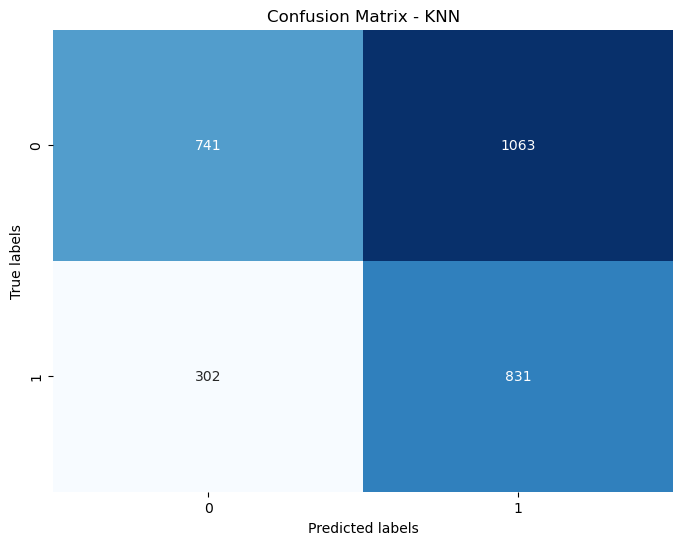

UMAP dataset


/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


Accuracy: 0.9160191681997703


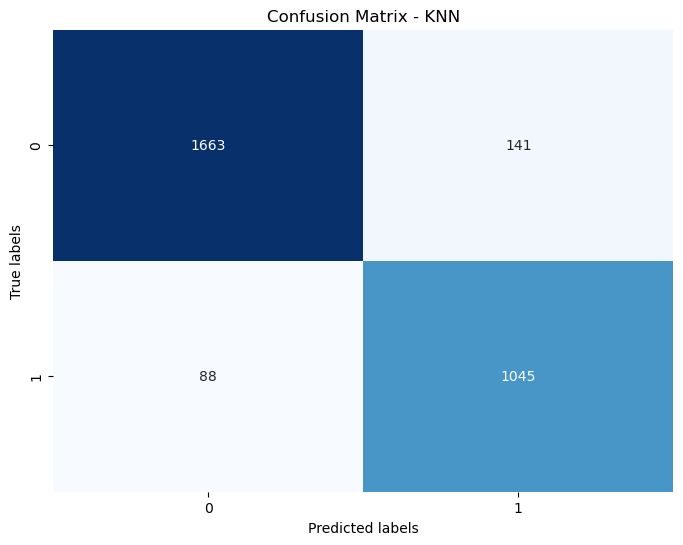

In [42]:
for x in dataset_dropseq.keys():
    print(x)
    kneighbors_dropseq = run_kneighbors(dataset_dropseq[x])
    filename = f"pickle/{tumor}/knn/dropseq_{x}"
    with open(filename, 'wb') as f:
        pickle.dump(kneighbors_dropseq, f)
    print(f"Accuracy: {kneighbors_dropseq['accuracy']}")
    plot_confusion_matrix(kneighbors_dropseq, kneighbors_dropseq['name'])

Text(0.5, 0.92, '3D Scatter plot of two genes')

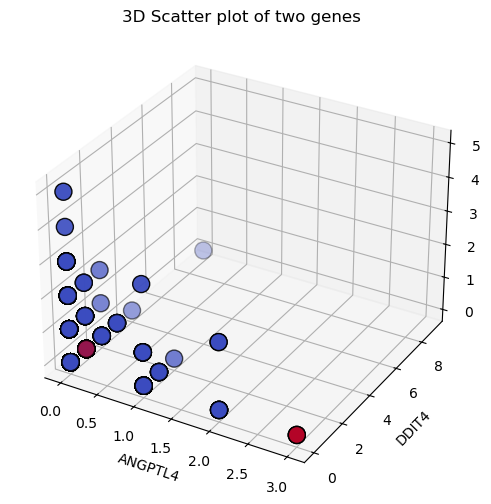

In [43]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
X, y, X_train, X_test, y_train, y_test, kfold = load_dataset(dataset_dropseq['merged dataset'])
scatter = ax.scatter(X['ANGPTL4'], X['DDIT4'], X['EGLN3'], c=y, cmap='coolwarm', edgecolor='k', s=150)

# Set labels and title
ax.set_xlabel('ANGPTL4')
ax.set_ylabel('DDIT4')
ax.set_zlabel('EGLN3')
ax.set_title('3D Scatter plot of two genes')

### Logistic regression classification

In [38]:
def run_log_regression(dataset):
    X, y, X_train, X_test, y_train, y_test, kfold = load_dataset(dataset)
    retval = {}
    retval['dataset'] = dataset
    retval['name'] = 'Logistic Regression'
    # Define the parameter grid
    param_grid = {
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'C': np.linspace(0.1, 1, 10),
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

    log_reg = LogisticRegression()

    random_search = RandomizedSearchCV(log_reg, param_distributions=param_grid, n_iter=50, scoring='accuracy',
                                        n_jobs=-1, cv=kfold, random_state=123)


    # Fit the model

    random_search.fit(X, y)

    # Print the best parameters
    retval['parameters'] = random_search.best_params_

    lr_optm = LogisticRegression(**random_search.best_params_)

    # Train the model
    lr_optm.fit(X_train, y_train)
    retval['model'] = lr_optm

    # Make predictions on the test set
    log_reg_predictions = lr_optm.predict(X_test)
    retval['predictions'] = log_reg_predictions

    # Calculate accuracy
    log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)

    # Perform k-fold cross-validation
    cv_results = cross_val_score(lr_optm, X, y, cv=kfold, scoring='accuracy')
    retval['accuracy'] = cv_results.mean()

    # Create confusion matrix
    conf_matrix = confusion_matrix(y_test, log_reg_predictions)
    retval['confusion_matrix'] = conf_matrix

    #Calculate Precision
    prec = precision_score(y_test, log_reg_predictions)
    retval['precision'] = prec

    #Calculate Recall
    rec = recall_score(y_test, log_reg_predictions)
    retval['recall'] = rec
    
    #Calculate F1 score
    f1 = f1_score(y_test, log_reg_predictions)
    retval['f1'] = f1

    #Calculate AUC
    auc = roc_auc_score(y_test, log_reg_predictions)
    retval['auc'] = auc

    return retval

merged dataset


/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did 

Accuracy: 0.9945945945945945


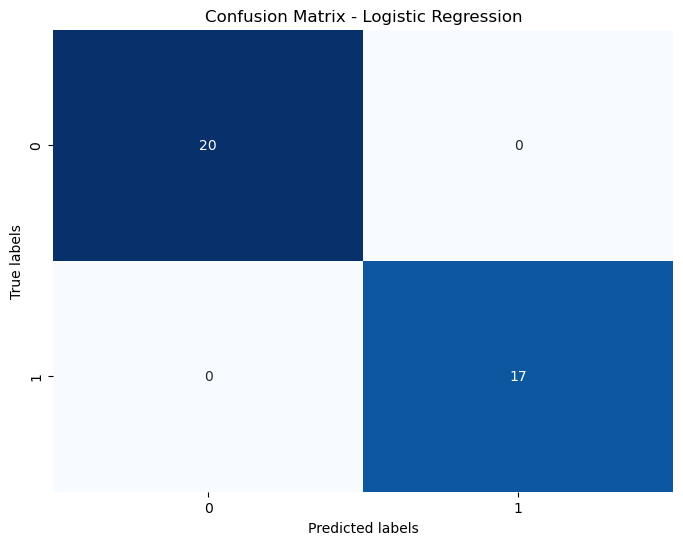

PCA dataset


/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did 

Accuracy: 0.9726726726726727


/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
160 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/edoardoghirardo/miniconda/envs/

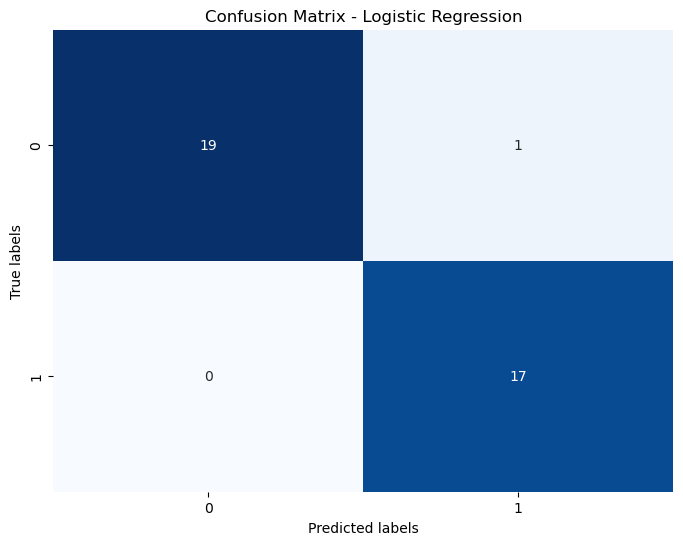

/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did 

UMAP dataset


/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did 

Accuracy: 0.9503003003003003


/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
160 fits failed out of a total of 250.
The

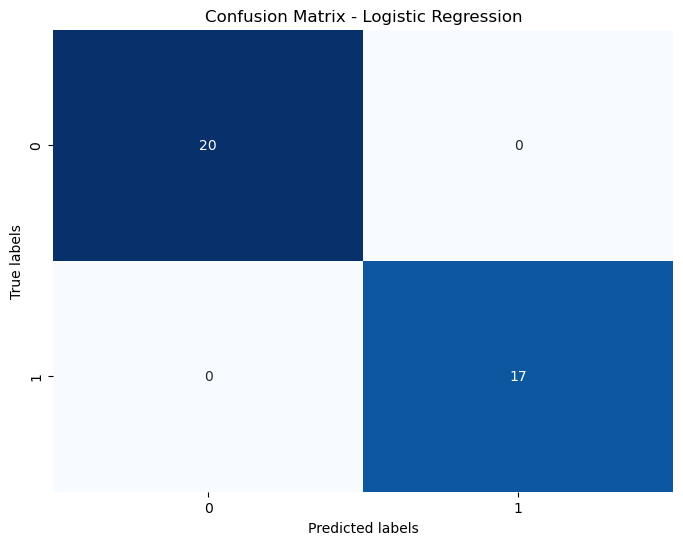

In [39]:
for x in dataset_smartseq.keys():
    print(x)
    log_regression_smartseq = run_log_regression(dataset_smartseq[x])
    filename = f"pickle/{tumor}/logreg/smartseq_{x}"
    with open(filename, 'wb') as f:
        pickle.dump(log_regression_smartseq, f)
    print(f"Accuracy: {log_regression_smartseq['accuracy']}")
    plot_confusion_matrix(log_regression_smartseq, log_regression_smartseq['name'])


In [40]:
# RERUN !!!

for x in dataset_dropseq.keys():
    print(x)
    log_regression_dropseq = run_log_regression(dataset_dropseq[x])
    filename = f"pickle/{tumor}/logreg/dropseq_{x}"
    with open(filename, 'wb') as f:
        pickle.dump(log_regression_dropseq, f)
    print(f"Accuracy: {log_regression_dropseq['accuracy']}")
    plot_confusion_matrix(log_regression_dropseq, log_regression_dropseq['name'])

merged dataset


KeyboardInterrupt: 

### Random forest classification

In [47]:
def run_random_forest(dataset):
    X, y, X_train, X_test, y_train, y_test, kfold = load_dataset(dataset)
    retval = {}
    retval['dataset'] = dataset
    retval['name'] = 'Random Forest'

    # We start by estimating the most important hyperparameter: the number of trees

    param_range = np.arange(1, 100, 10)
    train_scores, test_scores = validation_curve(
        RandomForestClassifier(random_state=42),
        X_train, y_train,
        param_name='n_estimators',
        param_range=param_range,
        cv=5,
        scoring='accuracy'
    )

    # We proceed to do a grid search to find the optimal hyperparameters with cross-validation
    param_grid = {
        'max_depth': np.arange(1, 10, 1),
        'min_samples_split': np.arange(2, 10, 1),
        'min_samples_leaf': np.arange(1, 10, 1)
    }

    grid_search = GridSearchCV(RandomForestClassifier(n_estimators = 21, random_state=42), param_grid, cv=10, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters
    retval['parameters']= grid_search.best_params_

    # Now we implement the best model
    rf_optm = RandomForestClassifier(n_estimators=21, random_state=42, **retval['parameters'])
    
    # Train the model
    rf_optm.fit(X_train, y_train)
    retval['model'] = rf_optm
    
    # Make predictions on the test set
    rf_predictions = rf_optm.predict(X_test)
    retval['predictions'] = rf_predictions


    # Calculate accuracy
    accuracy = accuracy_score(y_test,rf_predictions)

    # Perform k-fold cross-validation
    cv_results = cross_val_score(rf_optm, X, y, cv=kfold, scoring='accuracy')
    retval['accuracy'] = cv_results.mean()

    # Create confusion matrix
    conf_matrix = confusion_matrix(y_test, rf_predictions)
    retval['confusion_matrix'] = conf_matrix

    #Calculate Precision
    prec = precision_score(y_test, rf_predictions)
    retval['precision'] = prec

    #Calculate Recall
    rec = recall_score(y_test, rf_predictions)
    retval['recall'] = rec
    
    #Calculate F1 score
    f1 = f1_score(y_test, rf_predictions)
    retval['f1'] = f1

    #Calculate AUC
    auc = roc_auc_score(y_test, rf_predictions)
    retval['auc'] = auc

    return retval

merged dataset
Accuracy: 0.9782282282282282


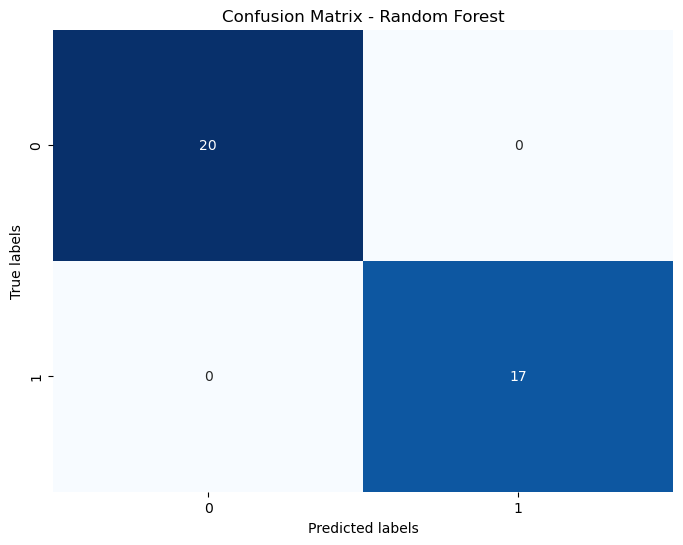

PCA dataset
Accuracy: 0.8417417417417417


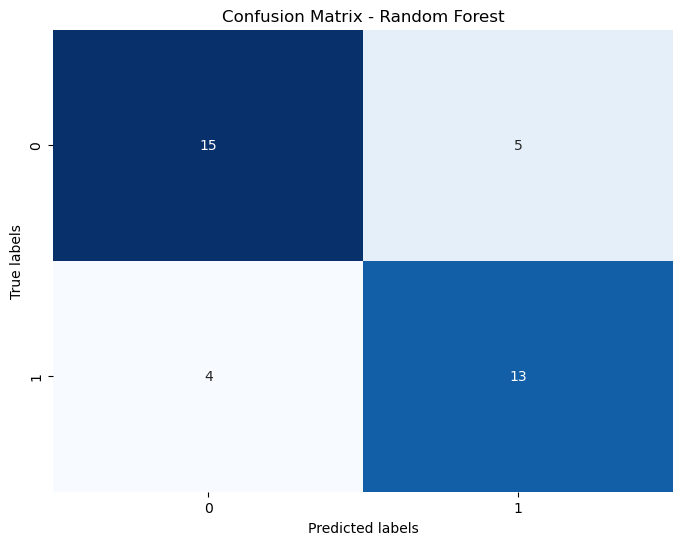

UMAP dataset
Accuracy: 0.9503003003003003


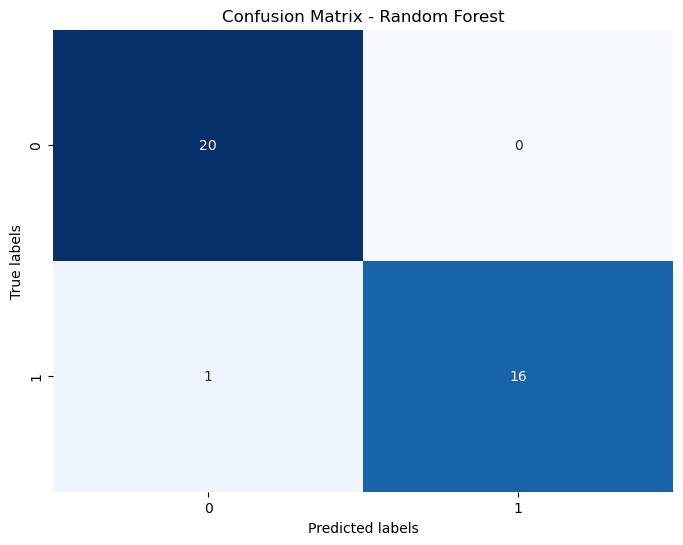

In [48]:
for x in dataset_smartseq.keys():
    print(x)
    rf_smartseq = run_random_forest(dataset_smartseq[x])
    filename = f"pickle/{tumor}/rf/smartseq_{x}"
    with open(filename, 'wb') as f:
        pickle.dump(rf_smartseq, f)
    print(f"Accuracy: {rf_smartseq['accuracy']}")
    plot_confusion_matrix(rf_smartseq, rf_smartseq['name'])


Fold 1 Evaluation Scores:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0

Fold 2 Evaluation Scores:
Accuracy: 0.918918918918919
Precision: 0.92
Recall: 0.9583333333333334
F1-score: 0.9387755102040817

Fold 3 Evaluation Scores:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0

Fold 4 Evaluation Scores:
Accuracy: 0.9722222222222222
Precision: 0.9230769230769231
Recall: 1.0
F1-score: 0.96

Fold 5 Evaluation Scores:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


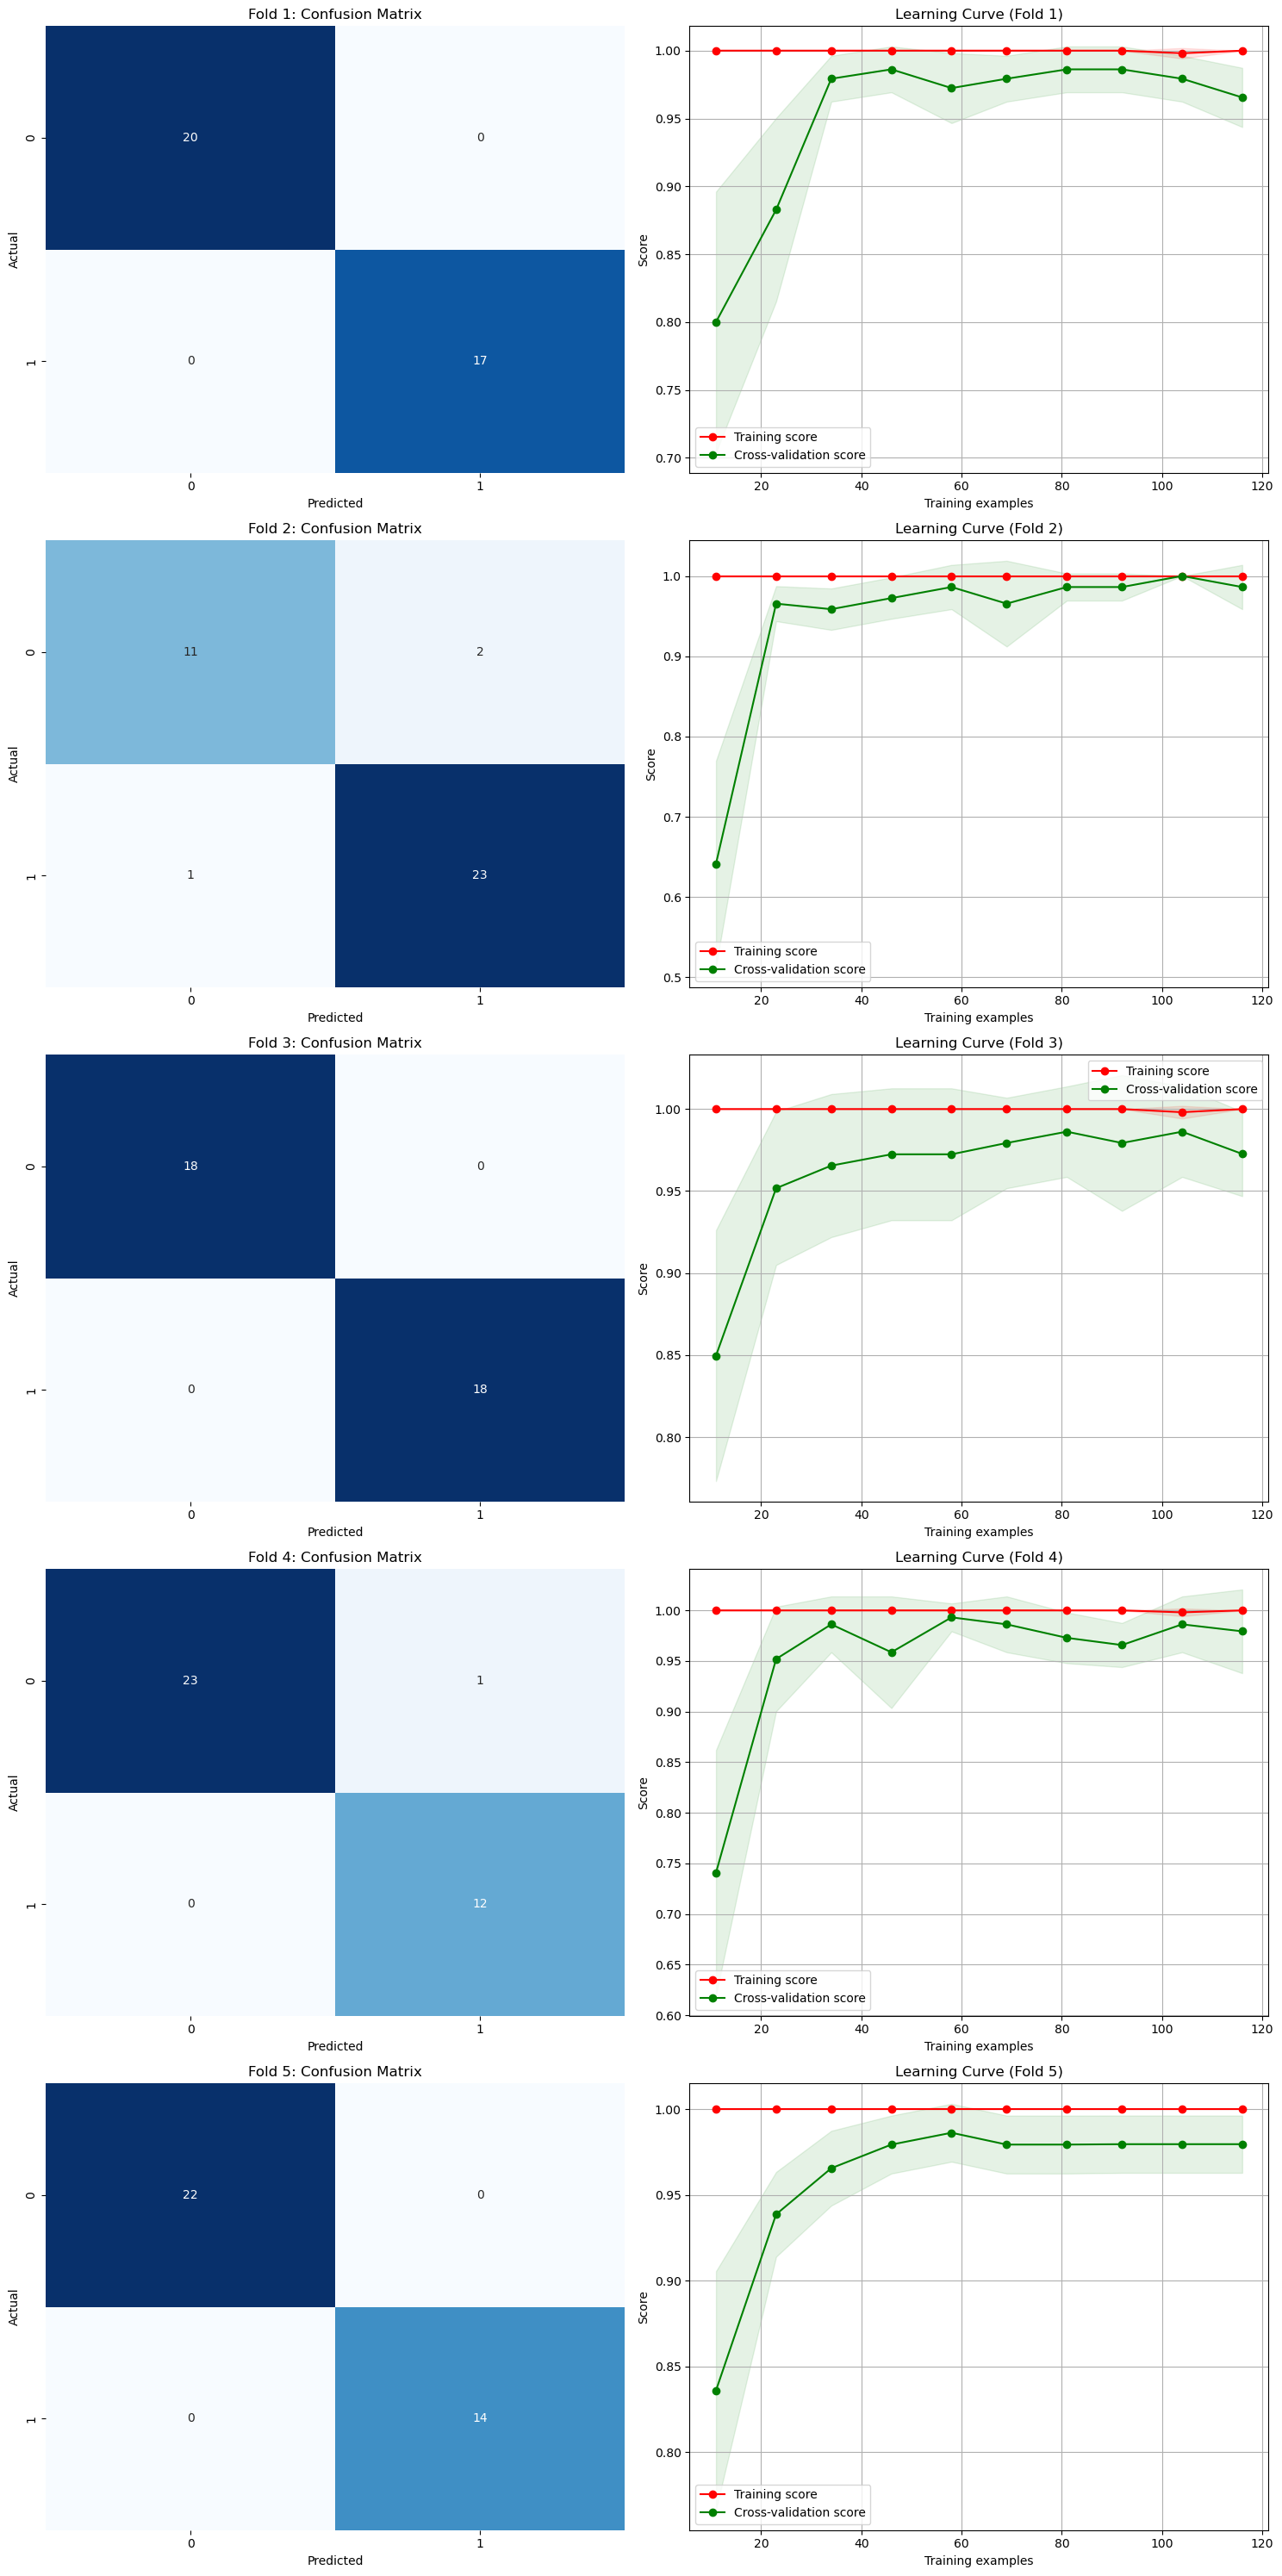


Mean Evaluation Scores Across Folds:
Mean Accuracy: 0.9782282282282282
Mean Precision: 0.9686153846153847
Mean Recall: 0.9916666666666668
Mean F1-score: 0.9797551020408164


In [49]:
# Initialize lists to store evaluation scores
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Create subplots for confusion matrices and learning curves
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 30))

X, y, X_train, X_test, y_train, y_test, kfold = load_dataset(dataset_smartseq['merged dataset'])

# Iterate over folds
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    # Split data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create a Random Forest Classifier model
    merged_randomforest_smartseq = run_random_forest(dataset_smartseq['merged dataset'])
    rf = RandomForestClassifier(n_estimators=21, random_state=42, **merged_randomforest_smartseq['parameters'])

    # Fit the model to the training data
    rf.fit(X_train, y_train)

    # Predict on the testing data
    y_pred = rf.predict(X_test)
    
    # Calculate evaluation scores
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append scores to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Print evaluation scores for each fold
    print(f"\nFold {i+1} Evaluation Scores:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False, ax=axes[i, 0])
    axes[i, 0].set_xlabel('Predicted')
    axes[i, 0].set_ylabel('Actual')
    axes[i, 0].set_title(f'Fold {i+1}: Confusion Matrix')

    # Plot learning curve
    train_sizes, train_scores, test_scores = learning_curve(rf, X_train, y_train, cv=kfold, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    axes[i, 1].fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    axes[i, 1].fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    axes[i, 1].plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    axes[i, 1].plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    axes[i, 1].set_xlabel("Training examples")
    axes[i, 1].set_ylabel("Score")
    axes[i, 1].set_title(f"Learning Curve (Fold {i+1})")
    axes[i, 1].legend(loc="best")
    axes[i, 1].grid()

plt.tight_layout()
plt.show()

# Print mean evaluation scores across all folds
print("\nMean Evaluation Scores Across Folds:")
print("Mean Accuracy:", np.mean(accuracy_scores))
print("Mean Precision:", np.mean(precision_scores))
print("Mean Recall:", np.mean(recall_scores))
print("Mean F1-score:", np.mean(f1_scores))


In [50]:
# Create a Random Forest Classifier model with the best parameters and enable OOB scoring
rf_OOB = RandomForestClassifier(n_estimators=21, random_state=42, **merged_randomforest_smartseq['parameters'], oob_score=True)
# Fit the model to the entire dataset
rf_OOB.fit(X, y)
# Access the OOB score
oob_accuracy = rf_OOB.oob_score_
# Print OOB accuracy
print("Out-of-Bag (OOB) Accuracy:", oob_accuracy)

Out-of-Bag (OOB) Accuracy: 0.9615384615384616


merged dataset
Accuracy: 0.8547889187932967


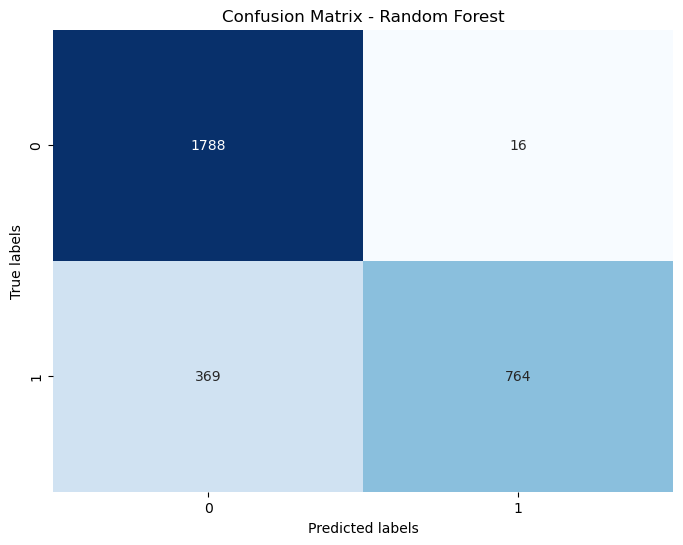

PCA dataset
Accuracy: 0.7776877089172347


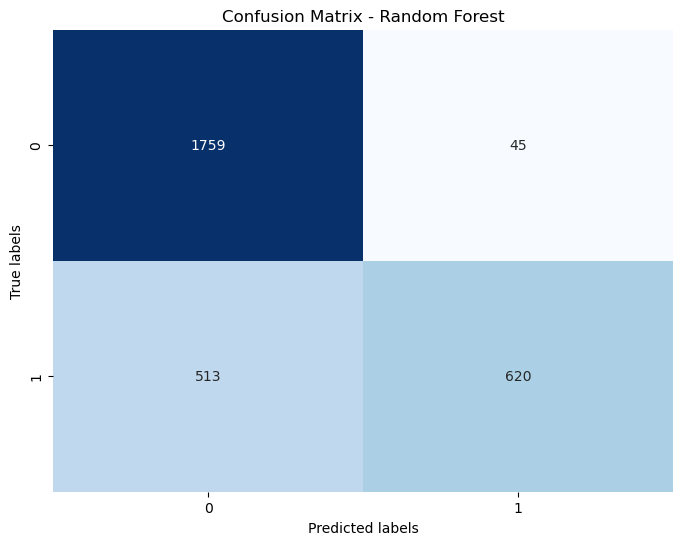

UMAP dataset
Accuracy: 0.9103660754129173


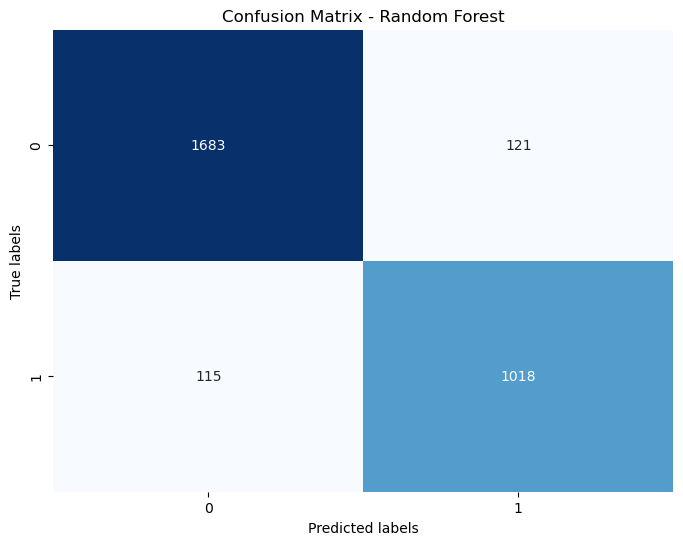

In [51]:
for x in dataset_dropseq.keys():
    print(x)
    rf_dropseq = run_random_forest(dataset_dropseq[x])
    filename = f"pickle/{tumor}/rf/dropseq_{x}"
    with open(filename, 'wb') as f:
        pickle.dump(rf_dropseq, f)
    print(f"Accuracy: {rf_dropseq['accuracy']}")
    plot_confusion_matrix(rf_dropseq, rf_dropseq['name'])

KeyboardInterrupt: 

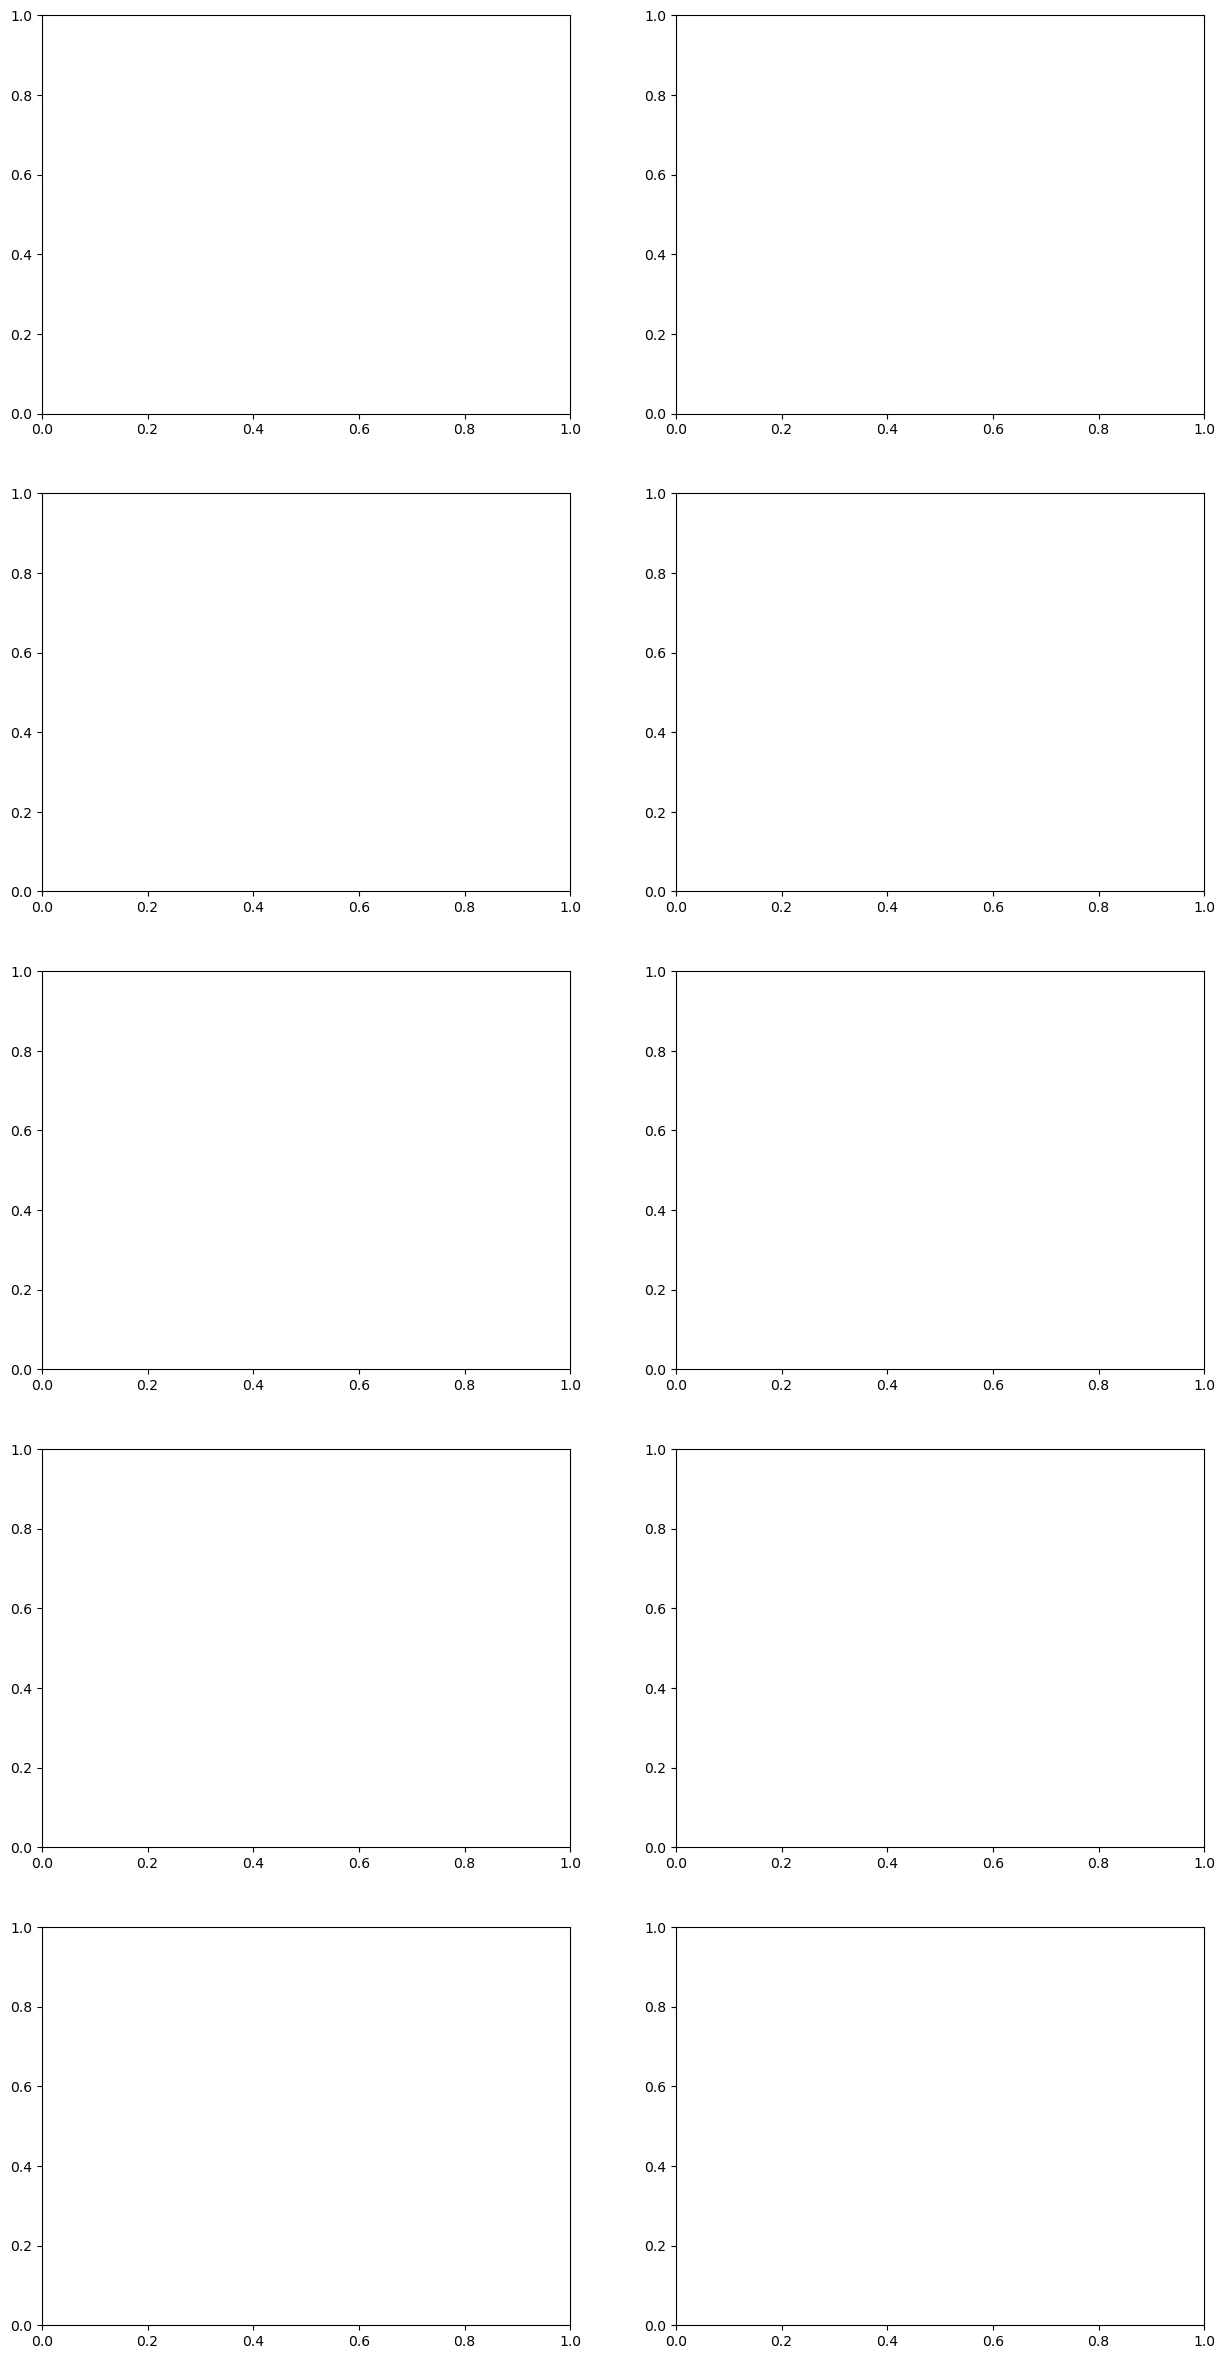

In [52]:
# Initialize lists to store evaluation scores
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Create subplots for confusion matrices and learning curves
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 30))

X, y, X_train, X_test, y_train, y_test, kfold = load_dataset(dataset_dropseq['merged dataset'])

# Iterate over folds
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    # Split data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create a Random Forest Classifier model
    merged_randomforest_dropseq = run_random_forest(dataset_dropseq['merged dataset'])
    rf = RandomForestClassifier(n_estimators=21, random_state=42, **merged_randomforest_dropseq['parameters'])

    # Fit the model to the training data
    rf.fit(X_train, y_train)

    # Predict on the testing data
    y_pred = rf.predict(X_test)



    # Calculate evaluation scores
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append scores to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Print evaluation scores for each fold
    print(f"\nFold {i+1} Evaluation Scores:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False, ax=axes[i, 0])
    axes[i, 0].set_xlabel('Predicted')
    axes[i, 0].set_ylabel('Actual')
    axes[i, 0].set_title(f'Fold {i+1}: Confusion Matrix')

    # Plot learning curve
    train_sizes, train_scores, test_scores = learning_curve(rf, X_train, y_train, cv=kfold, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    axes[i, 1].fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    axes[i, 1].fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    axes[i, 1].plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    axes[i, 1].plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    axes[i, 1].set_xlabel("Training examples")
    axes[i, 1].set_ylabel("Score")
    axes[i, 1].set_title(f"Learning Curve (Fold {i+1})")
    axes[i, 1].legend(loc="best")
    axes[i, 1].grid()

plt.tight_layout()
plt.show()

# Print mean evaluation scores across all folds
print("\nMean Evaluation Scores Across Folds:")
print("Mean Accuracy:", np.mean(accuracy_scores))
print("Mean Precision:", np.mean(precision_scores))
print("Mean Recall:", np.mean(recall_scores))
print("Mean F1-score:", np.mean(f1_scores))

In [ ]:
# Create a Random Forest Classifier model with the best parameters and enable OOB scoring
rf_OOB = RandomForestClassifier(n_estimators=21, random_state=42, **merged_randomforest_dropseq['parameters'], oob_score=True)
# Fit the model to the entire dataset
rf_OOB.fit(X, y)
# Access the OOB score
oob_accuracy = rf_OOB.oob_score_
# Print OOB accuracy
print("Out-of-Bag (OOB) Accuracy:", oob_accuracy)

Out-of-Bag (OOB) Accuracy: 0.9615384615384616


### Support Vector Machine

In [47]:
def run_svm(dataset):
    X, y, X_train, X_test, y_train, y_test, kfold = load_dataset(dataset)
    retval = {}
    retval['dataset'] = dataset
    retval['name'] = 'SVM'

    # Define the parameter grid
    param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000], 
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
                'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}
    
    svc_cl = SVC()

    # Initialize GridSearchCV with the SVC classifier and parameter grid

    #grid = GridSearchCV(svc_cl, param_grid, refit=True, verbose=3, cv=5, n_jobs=-1)  # cv=5 for 5-fold cross-validation
    random_search = RandomizedSearchCV(estimator = svc_cl, param_distributions=param_grid, n_iter=20, cv=kfold, verbose=2, n_jobs=-1, refit=True)

    # Perform grid search with cross-validation
    random_search.fit(X_train, y_train)

    # Print the best parameters found
    #print("Best parameters:", grid.best_params_)
    retval['parameters'] = random_search.best_params_

    #Now we implement the best model
    svm_optm = SVC(**random_search.best_params_)

    #train the model
    svm_optm.fit(X_train, y_train)
    retval['model'] = svm_optm

    # Make predictions on the test set
    svm_predictions = svm_optm.predict(X_test)
    retval['predictions'] = svm_predictions

    #Calculate accuracy
    accuracy = accuracy_score(y_test, svm_predictions)

    # Perform k-fold cross-validation
    cv_results = cross_val_score(svm_optm, X, y, cv=kfold, scoring='accuracy')
    retval['accuracy'] = cv_results.mean()

    # Create confusion matrix
    conf_matrix = confusion_matrix(y_test, svm_predictions)
    retval['confusion_matrix'] = conf_matrix

    #Calculate Precision
    prec = precision_score(y_test, svm_predictions)
    retval['precision'] = prec

    #Calculate Recall
    rec = recall_score(y_test, svm_predictions)
    retval['recall'] = rec
    
    #Calculate F1 score
    f1 = f1_score(y_test, svm_predictions)
    retval['f1'] = f1

    #Calculate AUC
    auc = roc_auc_score(y_test, svm_predictions)
    retval['auc'] = auc

    return retval

In [48]:
def plot_svm_feature_importance(model_dict):
    dataset = model_dict['dataset']
    X, y, X_train, X_test, y_train, y_test, kfold = load_dataset(dataset)
    feature_names = X_train.columns.tolist()

    # Check if the classifier is a linear SVM and has coefficients
    if hasattr(model_dict['model'], 'coef_'):
        # Get feature importances (coefficients)
        feature_importance = model_dict['model'].coef_[0]
        
        # Sort feature importances in descending order
        sorted_indices = np.argsort(np.abs(feature_importance))[::-1]
        sorted_feature_importance = feature_importance[sorted_indices]
        
        # Plot top 50 feature importances
        top_n = 50
        plt.figure(figsize=(12, 8))
        plt.bar(range(top_n), sorted_feature_importance[:top_n], align='center')
        plt.xticks(range(top_n), [feature_names[i] for i in sorted_indices[:top_n]], rotation=90)
        plt.xlabel('Feature')
        plt.ylabel('Coefficient Magnitude')
        plt.title('Top 50 Feature Importance (Coefficients)')
        plt.tight_layout()
        plt.show()

In [49]:
def plot_separating_hyperplane(model_dict):
    dataset = model_dict['dataset']
    X, y, X_train, X_test, y_train, y_test, kfold = load_dataset(dataset)

    # Reduce dimensionality of data to 3 dimensions using UMAP
    umap_model = umap.UMAP(n_components=3)
    X_train_3d_umap = umap_model.fit_transform(X_train)

    # Train the SVM classifier on the reduced-dimensional data
    best_svm_3d = SVC(C=0.01, gamma=1, kernel='linear', probability=True)
    best_svm_3d.fit(X_train_3d_umap, y_train)

    # Get the coefficients and intercept of the linear separator
    coef = best_svm_3d.coef_
    intercept = best_svm_3d.intercept_

    # Define ranges for creating a smaller meshgrid
    x_min, x_max = X_train_3d_umap[:, 0].min() - 1, X_train_3d_umap[:, 0].max() + 1
    y_min, y_max = X_train_3d_umap[:, 1].min() - 1, X_train_3d_umap[:, 1].max() + 1
    z_min, z_max = X_train_3d_umap[:, 2].min() - 1, X_train_3d_umap[:, 2].max() + 1

    # Create a smaller meshgrid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                        np.linspace(y_min, y_max, 50))

    # Calculate corresponding z values for the linear separator
    zz = (-coef[0, 0] * xx - coef[0, 1] * yy - intercept) / coef[0, 2]

    # Create a 3D scatter plot for the data points
    fig = px.scatter_3d(x=X_train_3d_umap[:, 0], y=X_train_3d_umap[:, 1], z=X_train_3d_umap[:, 2], color=y_train)

    # Add decision boundary to the plot
    fig.add_trace(go.Surface(x=xx, y=yy, z=zz, showscale=False, opacity=0.5, colorscale='Blues'))

    # Set axis labels
    fig.update_layout(scene=dict(xaxis_title='UMAP Component 1',
                                yaxis_title='UMAP Component 2',
                                zaxis_title='UMAP Component 3'),
                    title='Decision Boundary and Linear Separator in 3D')

    # Show the plot
    fig.show()


merged dataset
Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C

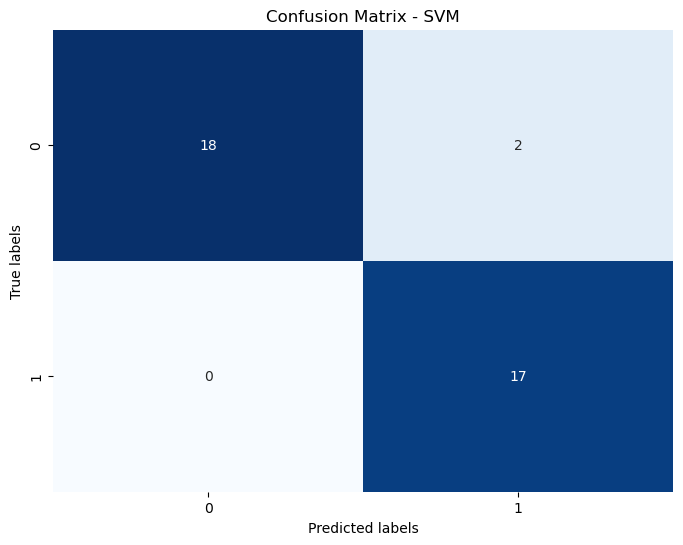

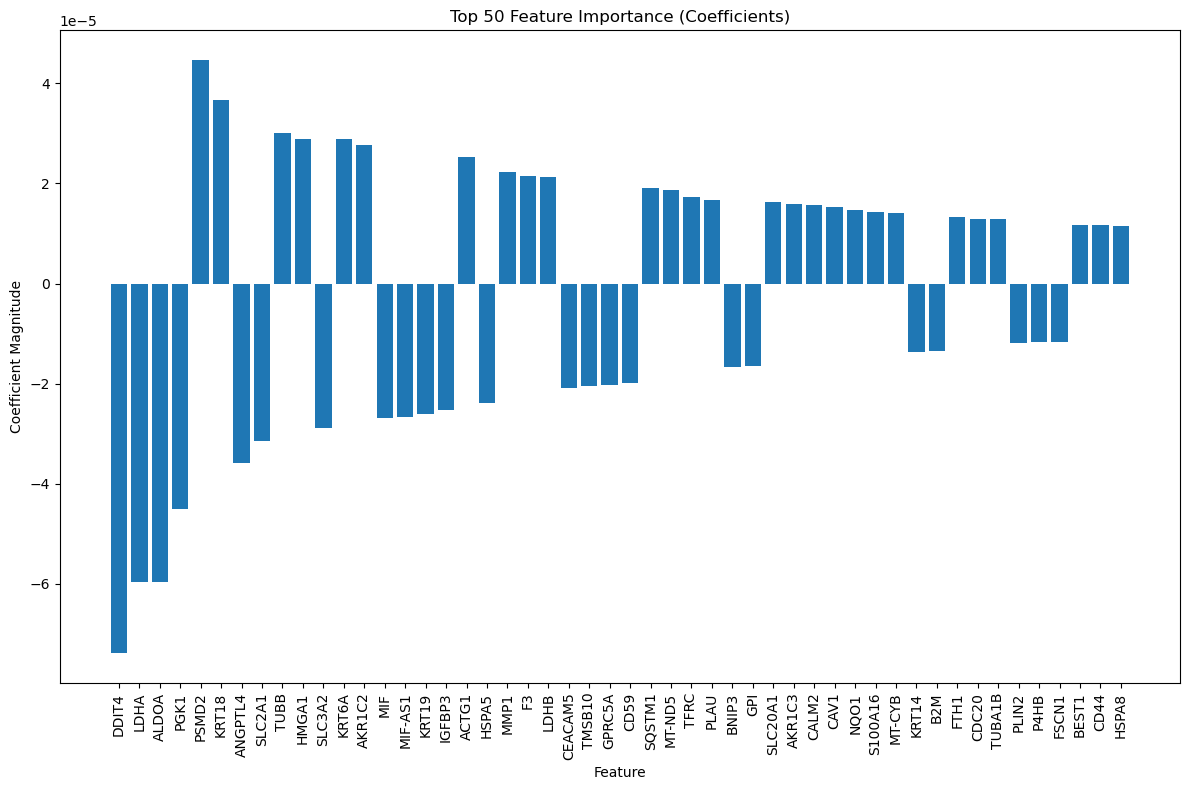

PCA dataset
Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=1000, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ..................C=1000, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ..................C=1000, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ..................C=1000, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ..................C=1000, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=

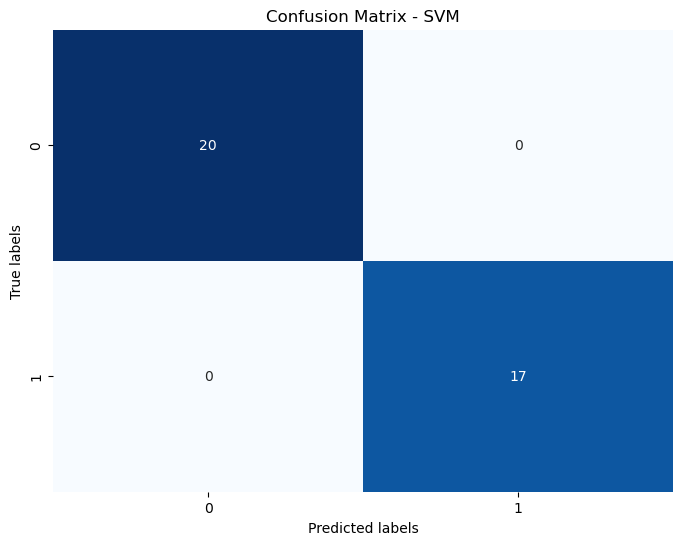

UMAP dataset
Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ....................C=100, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=100, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=100, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=100, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=100, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.1, 

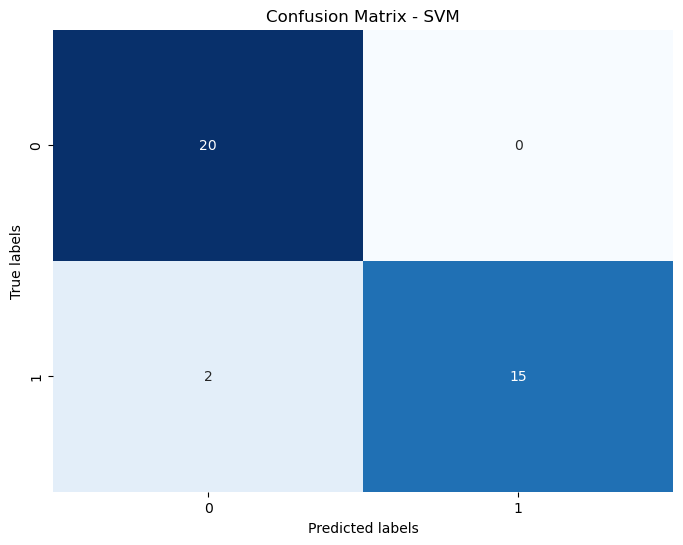

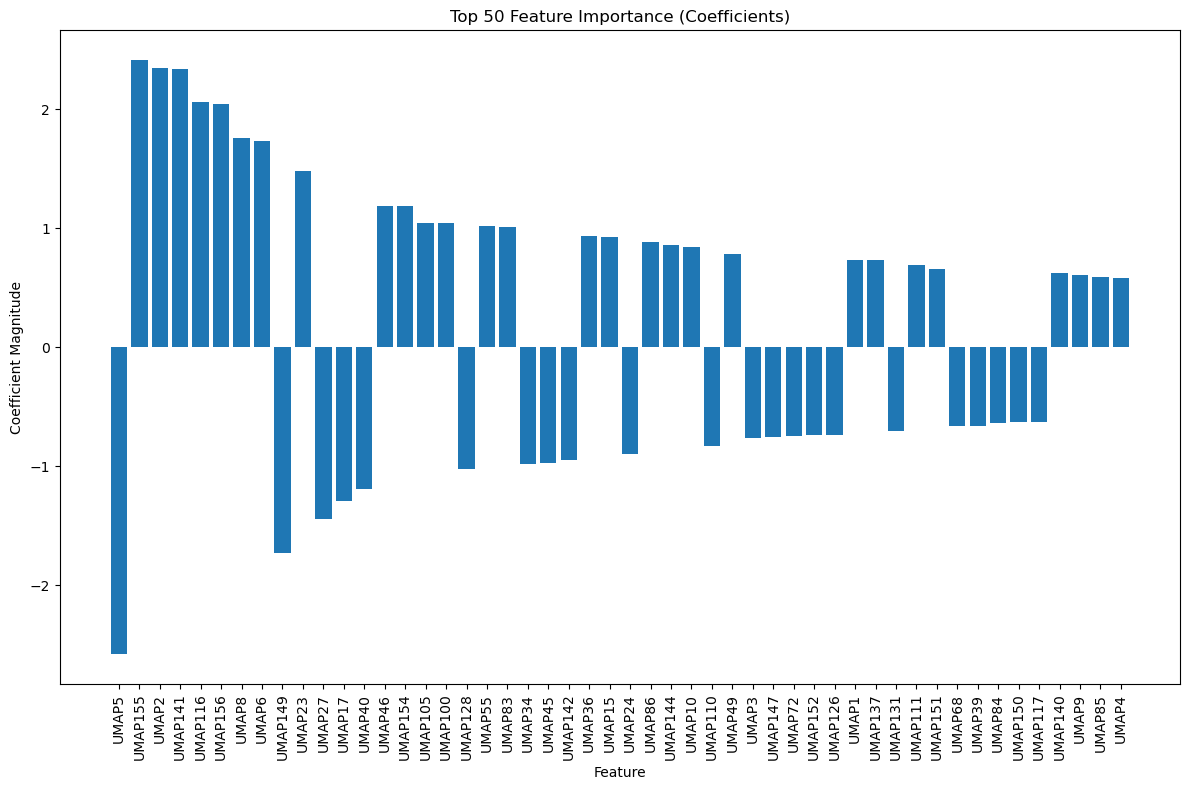

In [50]:
for x in dataset_smartseq.keys():
    print(x)
    svm_smartseq = run_svm(dataset_smartseq[x])
    filename = f"pickle/{tumor}/svm/smartseq_{x}"
    with open(filename, 'wb') as f:
        pickle.dump(svm_smartseq, f)
    print(f"Accuracy: {svm_smartseq['accuracy']}")
    plot_confusion_matrix(svm_smartseq, svm_smartseq['name'])
    plot_svm_feature_importance(svm_smartseq)
    plot_separating_hyperplane(svm_smartseq)

In [51]:
# RERUN !!!

for x in dataset_dropseq.keys():
    print(x)
    svm_dropseq = run_svm(dataset_dropseq[x])
    filename = f"pickle/{tumor}/svm/dropseq_{x}"
    with open(filename, 'wb') as f:
        pickle.dump(svm_dropseq, f)
    print(f"Accuracy: {svm_dropseq['accuracy']}")
    plot_confusion_matrix(svm_dropseq, svm_dropseq['name'])
    plot_svm_feature_importance(svm_dropseq)
    plot_separating_hyperplane(svm_dropseq)

merged dataset
Fitting 5 folds for each of 20 candidates, totalling 100 fits


KeyboardInterrupt: 

### Neural network

In [53]:
def run_nn(dataset, epochs):
    X, y, X_train, X_test, y_train, y_test, kfold = load_dataset(dataset)
    retval = {}
    retval['dataset'] = dataset
    retval['name'] = 'NN'
    nn_model = tf.keras.models.Sequential()
    nn_model.add(tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)))
    nn_model.add(tf.keras.layers.Dense(128, activation='relu'))
    nn_model.add(tf.keras.layers.Dropout(0.1))
    nn_model.add(tf.keras.layers.Dense(128, activation='relu'))
    nn_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    #Train the model
    nn_model.fit(X_train, y_train, epochs=epochs)


    retval['model'] = nn_model
    
    #Make predictions on the test set
    nn_predictions = [int(i) for i in nn_model.predict(X_test)]
    retval['predictions'] = nn_predictions

    # Create confusion matrix
    conf_matrix = confusion_matrix(y_test, nn_predictions)
    retval['confusion_matrix'] = conf_matrix

    # Calculate accuracy
    loss, accuracy = nn_model.evaluate(X_test, y_test)
    retval['accuracy'] = accuracy

    #Calculate Precision
    prec = precision_score(y_test, nn_predictions)
    retval['precision'] = prec

    #Calculate Recall
    rec = recall_score(y_test, nn_predictions)
    retval['recall'] = rec
    
    #Calculate F1 score
    f1 = f1_score(y_test, nn_predictions)
    retval['f1'] = f1

    #Calculate AUC
    auc = roc_auc_score(y_test, nn_predictions)
    retval['auc'] = auc
    
    return retval

In [54]:
from sklearn.neural_network import MLPClassifier

def run_nn(dataset, epochs):
    X, y, X_train, X_test, y_train, y_test, kfold = load_dataset(dataset)
    retval = {}
    retval['dataset'] = dataset
    retval['name'] = 'NN'
    nn_model = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(128, 128), random_state=1, max_iter=epochs, verbose=True)

    nn_model.fit(X_train, y_train)

    retval['model'] = nn_model
    
    #Make predictions on the test set
    nn_predictions = nn_model.predict(X_test)
    retval['predictions'] = nn_predictions

    # Create confusion matrix
    conf_matrix = confusion_matrix(y_test, nn_predictions)
    retval['confusion_matrix'] = conf_matrix

    # Calculate accuracy
    accuracy = nn_model.score(X_test, y_test)
    retval['accuracy'] = accuracy

    #Calculate Precision
    prec = precision_score(y_test, nn_predictions)
    retval['precision'] = prec

    #Calculate Recall
    rec = recall_score(y_test, nn_predictions)
    retval['recall'] = rec
    
    #Calculate F1 score
    f1 = f1_score(y_test, nn_predictions)
    retval['f1'] = f1

    #Calculate AUC
    auc = roc_auc_score(y_test, nn_predictions)
    retval['auc'] = auc
    
    return retval

merged dataset
Iteration 1, loss = 16.63453648
Iteration 2, loss = 19.14043577
Iteration 3, loss = 18.89185885
Iteration 4, loss = 6.35432092
Iteration 5, loss = 11.62926966
Iteration 6, loss = 14.02650757
Iteration 7, loss = 9.79096015
Iteration 8, loss = 3.17018303
Iteration 9, loss = 0.66045242
Iteration 10, loss = 1.98862841
Iteration 11, loss = 3.23151561
Iteration 12, loss = 2.98293612
Iteration 13, loss = 1.49147461
Iteration 14, loss = 0.00001311
Iteration 15, loss = 0.07159354
Iteration 16, loss = 2.56611951
Iteration 17, loss = 2.24860022
Iteration 18, loss = 0.24877276
Iteration 19, loss = 0.00001318
Iteration 20, loss = 0.00001319
Iteration 21, loss = 0.00001320
Iteration 22, loss = 0.00001321
Iteration 23, loss = 0.06994004
Iteration 24, loss = 0.48002977
Iteration 25, loss = 0.56101491
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Accuracy: 0.9459459459459459


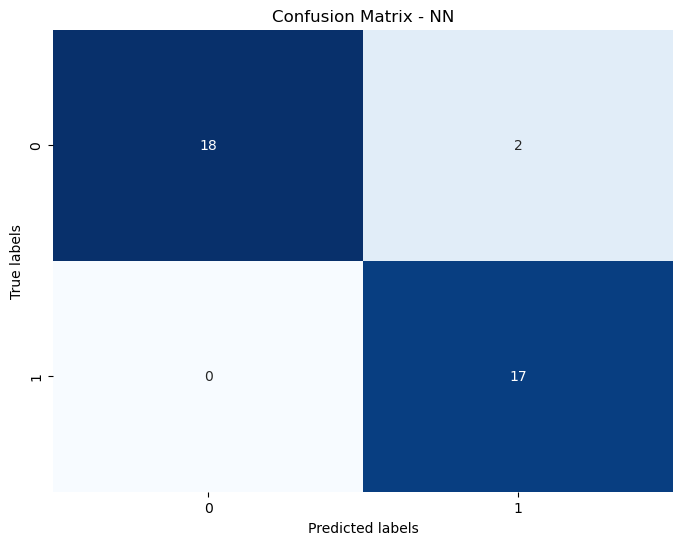

PCA dataset
Iteration 1, loss = 1.68391819
Iteration 2, loss = 1.07088978
Iteration 3, loss = 0.81827565
Iteration 4, loss = 0.66860618
Iteration 5, loss = 0.50218066
Iteration 6, loss = 0.33841375
Iteration 7, loss = 0.21542132
Iteration 8, loss = 0.14329251
Iteration 9, loss = 0.10705238
Iteration 10, loss = 0.08786181
Iteration 11, loss = 0.07523026
Iteration 12, loss = 0.06475274
Iteration 13, loss = 0.05508267
Iteration 14, loss = 0.04604302
Iteration 15, loss = 0.03790607
Iteration 16, loss = 0.03099637
Iteration 17, loss = 0.02537541
Iteration 18, loss = 0.02088702
Iteration 19, loss = 0.01737644
Iteration 20, loss = 0.01463680
Iteration 21, loss = 0.01250440
Iteration 22, loss = 0.01083729
Iteration 23, loss = 0.00952788
Iteration 24, loss = 0.00848719
Iteration 25, loss = 0.00764600
Iteration 26, loss = 0.00695984
Iteration 27, loss = 0.00639173
Iteration 28, loss = 0.00591441
Iteration 29, loss = 0.00550859
Iteration 30, loss = 0.00515882
Iteration 31, loss = 0.00485412
Itera

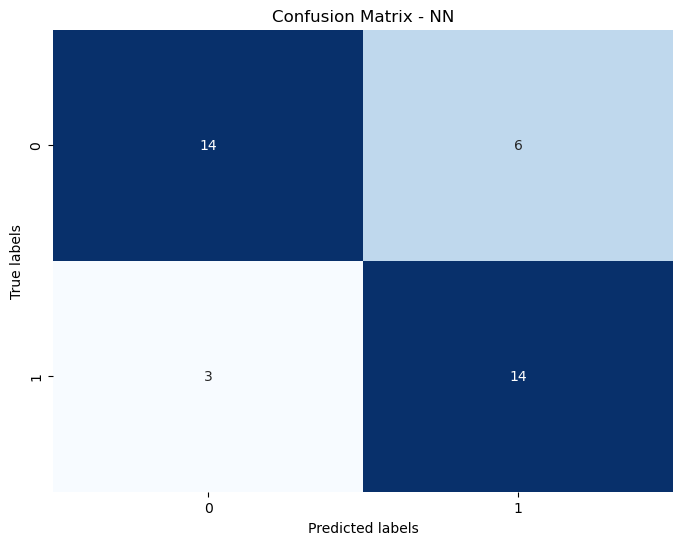

UMAP dataset
Iteration 1, loss = 1.53322773
Iteration 2, loss = 1.12900832
Iteration 3, loss = 1.14324455
Iteration 4, loss = 0.74675129
Iteration 5, loss = 0.80356811
Iteration 6, loss = 0.95931107
Iteration 7, loss = 0.80476275
Iteration 8, loss = 0.68473051
Iteration 9, loss = 0.78464728
Iteration 10, loss = 0.83730545
Iteration 11, loss = 0.75479427
Iteration 12, loss = 0.68145978
Iteration 13, loss = 0.72805681
Iteration 14, loss = 0.77839162
Iteration 15, loss = 0.73881848
Iteration 16, loss = 0.68315819
Iteration 17, loss = 0.69779807
Iteration 18, loss = 0.73568182
Iteration 19, loss = 0.72292843
Iteration 20, loss = 0.68425741
Iteration 21, loss = 0.68321732
Iteration 22, loss = 0.71083582
Iteration 23, loss = 0.70946178
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Accuracy: 0.4864864864864865


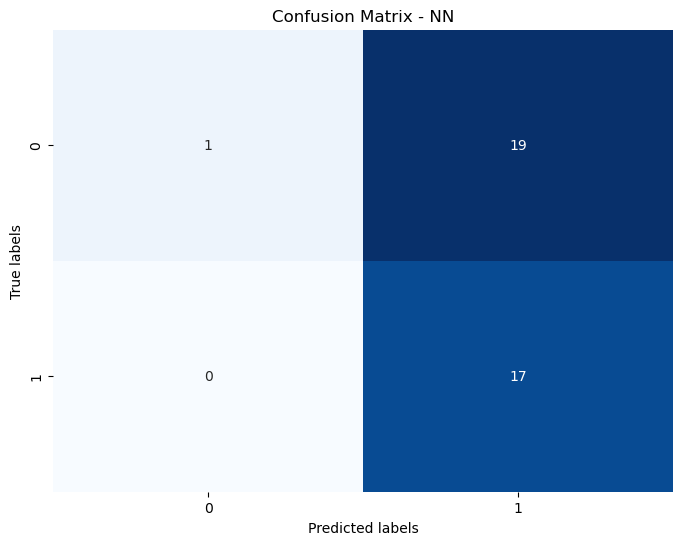

In [55]:
n_epochs = 100

for x in dataset_smartseq.keys():
    print(x)
    nn_smartseq = run_nn(dataset_smartseq[x], n_epochs)
    filename = f"pickle/{tumor}/nn/smartseq_{x}"
    with open(filename, 'wb') as f:
        pickle.dump(nn_smartseq, f)
    print(f"Accuracy: {nn_smartseq['accuracy']}")
    plot_confusion_matrix(nn_smartseq, nn_smartseq['name'])

merged dataset
Iteration 1, loss = 0.22779677
Iteration 2, loss = 0.06770124
Iteration 3, loss = 0.03517523
Iteration 4, loss = 0.01540461
Iteration 5, loss = 0.00526049
Iteration 6, loss = 0.00172589
Iteration 7, loss = 0.00074024
Iteration 8, loss = 0.00044673
Iteration 9, loss = 0.00032388
Iteration 10, loss = 0.00024591
Iteration 11, loss = 0.00019575
Iteration 12, loss = 0.00015997
Iteration 13, loss = 0.00013414
Iteration 14, loss = 0.00011404
Iteration 15, loss = 0.00009869
Iteration 16, loss = 0.00008678
Iteration 17, loss = 0.00007685
Iteration 18, loss = 0.00006897
Iteration 19, loss = 0.00006236
Iteration 20, loss = 0.00005672
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Accuracy: 0.9622063329928499


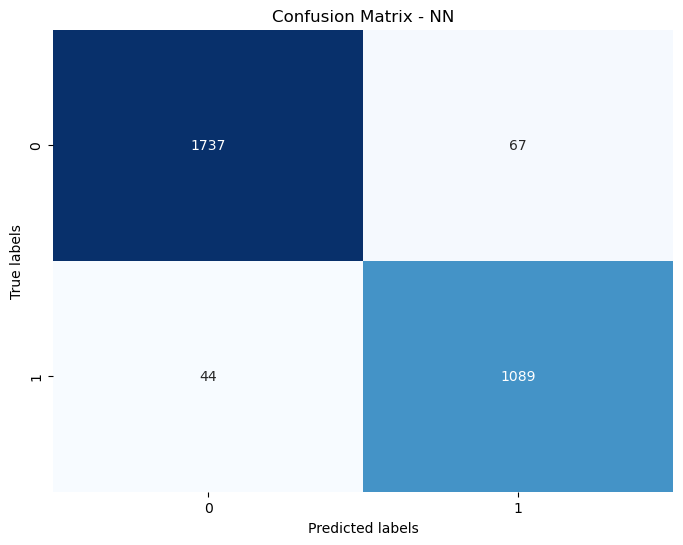

PCA dataset
Iteration 1, loss = 0.54994910
Iteration 2, loss = 0.07432759
Iteration 3, loss = 0.02069583
Iteration 4, loss = 0.01655015
Iteration 5, loss = 0.00843890
Iteration 6, loss = 0.00918464
Iteration 7, loss = 0.00789873
Iteration 8, loss = 0.00814018
Iteration 9, loss = 0.01645761
Iteration 10, loss = 0.02004204
Iteration 11, loss = 0.01844537
Iteration 12, loss = 0.00771448
Iteration 13, loss = 0.00107135
Iteration 14, loss = 0.00040429
Iteration 15, loss = 0.00027360
Iteration 16, loss = 0.00021041
Iteration 17, loss = 0.00016996
Iteration 18, loss = 0.00014183
Iteration 19, loss = 0.00012105
Iteration 20, loss = 0.00010528
Iteration 21, loss = 0.00009290
Iteration 22, loss = 0.00008295
Iteration 23, loss = 0.00007477
Iteration 24, loss = 0.00006799
Iteration 25, loss = 0.00006231
Iteration 26, loss = 0.00005744
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Accuracy: 0.9400749063670412


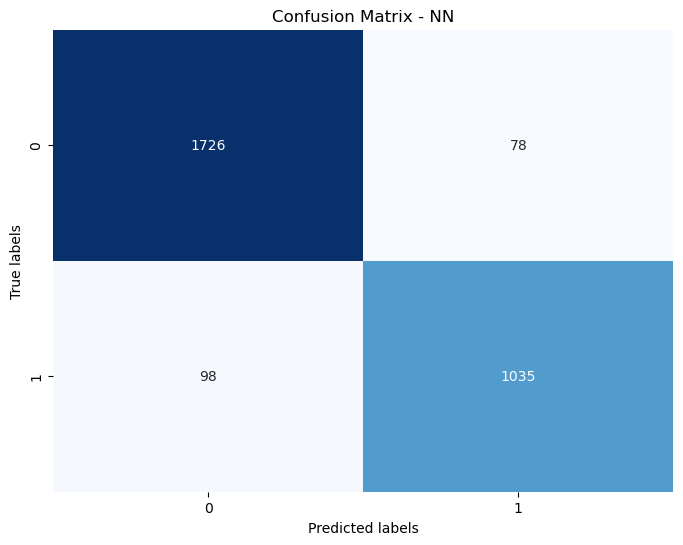

UMAP dataset
Iteration 1, loss = 1.17959221
Iteration 2, loss = 0.69654694
Iteration 3, loss = 0.69561093
Iteration 4, loss = 0.70936000
Iteration 5, loss = 0.68532969
Iteration 6, loss = 0.69204127
Iteration 7, loss = 0.69647039
Iteration 8, loss = 0.67740862
Iteration 9, loss = 0.68676132
Iteration 10, loss = 0.67529703
Iteration 11, loss = 0.68007481
Iteration 12, loss = 0.67531153
Iteration 13, loss = 0.67495312
Iteration 14, loss = 0.67505352
Iteration 15, loss = 0.67271112
Iteration 16, loss = 0.67278248
Iteration 17, loss = 0.67467864
Iteration 18, loss = 0.68086690
Iteration 19, loss = 0.67850447
Iteration 20, loss = 0.67212397
Iteration 21, loss = 0.67375344
Iteration 22, loss = 0.67391207
Iteration 23, loss = 0.67260013
Iteration 24, loss = 0.67683001
Iteration 25, loss = 0.67494175
Iteration 26, loss = 0.67609440
Iteration 27, loss = 0.67358910
Iteration 28, loss = 0.67185577
Iteration 29, loss = 0.67570955
Iteration 30, loss = 0.67713667
Iteration 31, loss = 0.67299579
Iter

/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


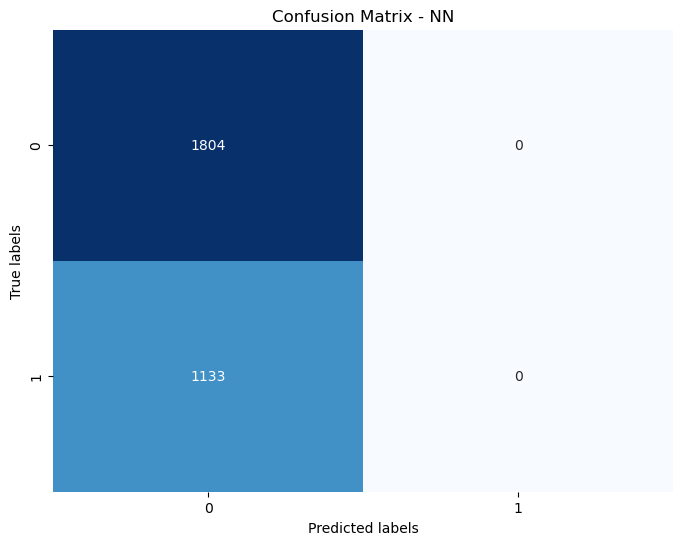

In [56]:
for x in dataset_dropseq.keys():
    print(x)
    nn_dropseq = run_nn(dataset_dropseq[x], n_epochs)
    filename = f"pickle/{tumor}/nn/dropseq_{x}"
    with open(filename, 'wb') as f:
        pickle.dump(nn_dropseq, f)
    print(f"Accuracy: {nn_dropseq['accuracy']}")
    plot_confusion_matrix(nn_dropseq, nn_dropseq['name'])

## Ensemble method

We are now interested in constructing an ensemble method with all the models we created. We define the Ensemble class from scratch since we want the voting to happen between our pre-trained models, and not have to train them again.We then evaluate the performance of the classifier, and report various classification metrics including accuracy, cross-validation accuracy, confusion matrix, precision, recall, F1-score, and AUC.

In [56]:
names = ['xgboost', 'knn', 'logreg', 'rf', 'svm', 'nn'] 
#names = ['xgboost', 'knn', 'rf', 'nn'] 

In [60]:
class Ensemble():
    def __init__(self, models):
        self.models = models

    def predict(self, X):
        predictions = np.column_stack([model.predict(X) for model in self.models.values()])
        return np.mean(predictions, axis=1).astype(int)

    def score(self, X, y):
        return accuracy_score(y, self.predict(X))

In [64]:
models = {}
X, y, X_train, X_test, y_train, y_test, kfold = load_dataset(merged_dropseq)

for name in names:
    print(name)
    filename = f"pickle/{tumor}/{name}/dropseq_merged dataset"
    with open(filename, 'rb') as f:
        result = pickle.load(f)
        models[name] = result['model']


ensemble_model = Ensemble(models)

# Make predictions
ensemble_predictions = ensemble_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, ensemble_predictions)
print("Accuracy:", accuracy)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, ensemble_predictions)
print("Confusion Matrix:\n", conf_matrix)

# Calculate Precision
precision = precision_score(y_test, ensemble_predictions)
print("Precision:", precision)

# Calculate Recall
recall = recall_score(y_test, ensemble_predictions)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, ensemble_predictions)
print("F1-score:", f1)

# Calculate AUC
auc = roc_auc_score(y_test, ensemble_predictions)
print("AUC:", auc)

xgboost
knn
rf
nn
Accuracy: 0.8597208035410283
Confusion Matrix:
 [[1802    2]
 [ 410  723]]
Precision: 0.9972413793103448
Recall: 0.6381288614298323
F1-score: 0.7782561894510226
AUC: 0.8185101069898607


In [65]:
models = {}
X, y, X_train, X_test, y_train, y_test, kfold = load_dataset(merged_smartseq)

for name in names:
    print(name)
    filename = f"pickle/{tumor}/{name}/smartseq_merged dataset"
    with open(filename, 'rb') as f:
        result = pickle.load(f)
        models[name] = result['model']


ensemble_model = Ensemble(models)

# Make predictions
ensemble_predictions = ensemble_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, ensemble_predictions)
print("Accuracy:", accuracy)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, ensemble_predictions)
print("Confusion Matrix:\n", conf_matrix)

# Calculate Precision
precision = precision_score(y_test, ensemble_predictions)
print("Precision:", precision)

# Calculate Recall
recall = recall_score(y_test, ensemble_predictions)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, ensemble_predictions)
print("F1-score:", f1)

# Calculate AUC
auc = roc_auc_score(y_test, ensemble_predictions)
print("AUC:", auc)

xgboost
knn
rf
nn
Accuracy: 1.0
Confusion Matrix:
 [[20  0]
 [ 0 17]]
Precision: 1.0
Recall: 1.0
F1-score: 1.0
AUC: 1.0


## Pipeline for model comparison

In [24]:
names = ['xgboost', 'knn', 'logreg', 'rf', 'svm', 'nn'] 

In [26]:
model_pipleline_smartseq = []

for name in names:
    print(name)
    filename = f"pickle/{tumor}/{name}/smartseq_merged dataset"
    with open(filename, 'rb') as f:
        model = pickle.load(f)
        model_pipleline_smartseq.append(model)

xgboost
knn
logreg
rf
svm
nn


In [28]:
model_pipleline_dropseq = []

for name in names:
    filename = f"pickle/{tumor}/{name}/dropseq_merged dataset"
    with open(filename, 'rb') as f:
        model = pickle.load(f)
        model_pipleline_dropseq.append(model)

FileNotFoundError: [Errno 2] No such file or directory: 'pickle/HCC1806/svm/dropseq_merged dataset'

In [29]:
# Create a metric of comparison for the models
model_names = []
acc_list = []
prec_list_n = []
rec_list_n = []
f1_list_n = []
auc_list = []

for model in model_pipleline_smartseq:
    
    # Name 
    model_names.append(model['name'])

    # Accuracy
    acc = model['accuracy']
    acc_list.append(f"{acc}")
    # Precision
    prec = model['precision']
    prec_list_n.append(f"{prec.mean()}")
    # Recall
    rec = model['recall']
    rec_list_n.append(f"{rec.mean()}")
    # F1 score
    f1 = model['f1']
    f1_list_n.append(f"{f1.mean()}")
    # AUC score
    auc = model['auc']
    auc_list.append(f"{auc.mean()}")

data_smartseq = {
'Model': model_names,
'Accuracy': acc_list,
'Precision': prec_list_n,
'Recall': rec_list_n,
'F1 Score': f1_list_n,
'AUC Score': auc_list
}

df_smartseq = pd.DataFrame(data_smartseq)

# Display DataFrame
print(df_smartseq)


                 Model            Accuracy           Precision Recall  \
0              XGboost  0.9837837837837838  0.9444444444444444    1.0   
1                  KNN  0.9669669669669669                 1.0    1.0   
2  Logistic Regression  0.9945945945945945                 1.0    1.0   
3        Random Forest  0.9782282282282282                 1.0    1.0   
4                  SVM  0.9783783783783784  0.8947368421052632    1.0   
5                   NN  0.9459459459459459  0.8947368421052632    1.0   

             F1 Score           AUC Score  
0  0.9714285714285714               0.975  
1                 1.0                 1.0  
2                 1.0                 1.0  
3                 1.0                 1.0  
4  0.9444444444444444  0.9500000000000001  
5  0.9444444444444444  0.9500000000000001  


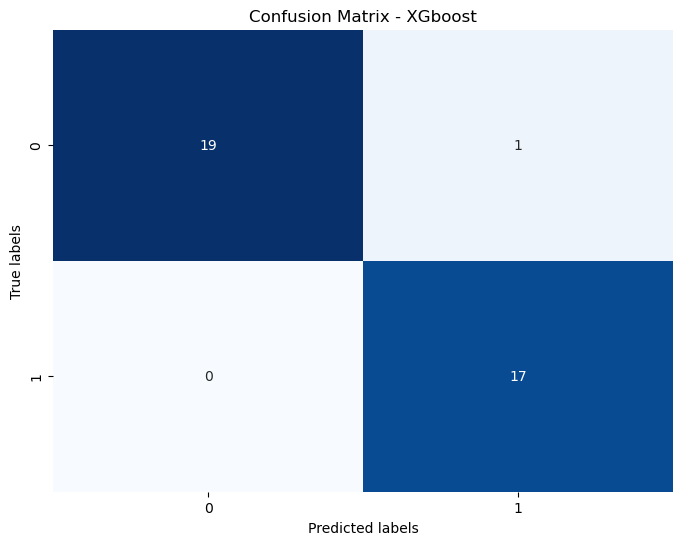

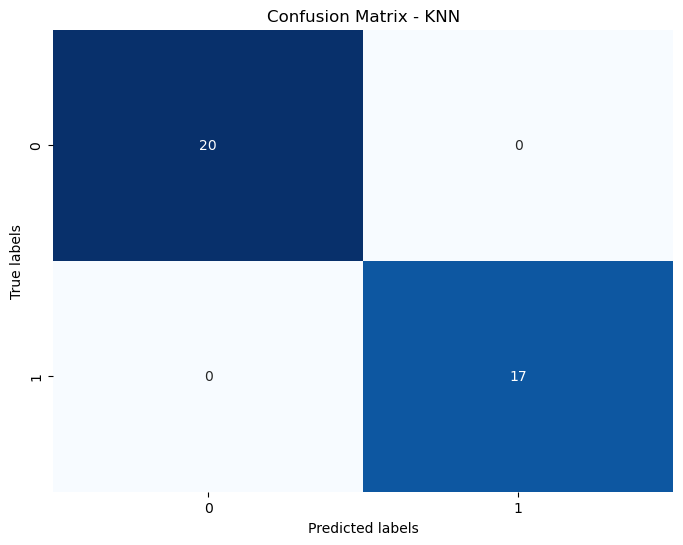

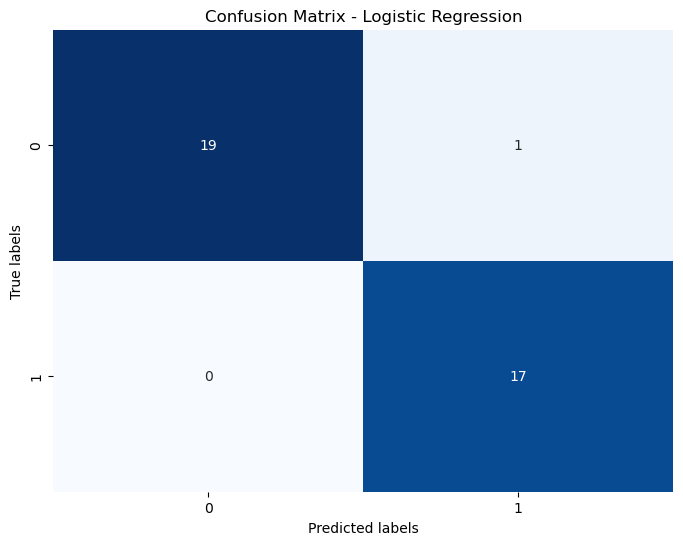

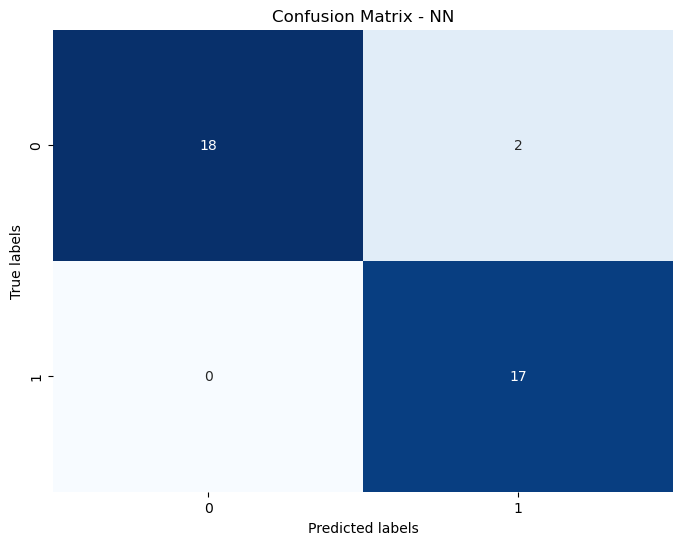

In [ ]:
# we will now create plots for the five confusion matrices

for i, model in enumerate(model_pipleline_smartseq):
    plot_confusion_matrix(model, model['name'])

In [ ]:
# Create a metric of comparison for the models
model_names = []
acc_list = []
prec_list_n = []
rec_list_n = []
f1_list_n = []
auc_list = []

for model in model_pipleline_dropseq:
    
    # Name 
    model_names.append(model['name'])

    # Accuracy
    acc = model['accuracy']
    acc_list.append(f"{acc.mean().round(3)}±{acc.std().round(3)}")
    # Precision
    prec = model['precision']
    prec_list_n.append(f"{prec.mean().round(3)}±{prec.std().round(3)}")
    # Recall
    rec = model['recall']
    rec_list_n.append(f"{rec.mean().round(3)}±{rec.std().round(3)}")
    # F1 score
    f1 = model['f1']
    f1_list_n.append(f"{f1.mean().round(3)}±{f1.std().round(3)}")
    # AUC score
    auc = model['auc']
    auc_list.append(f"{auc.mean().round(3)}±{auc.std().round(3)}")

data_dropseq = {
'Model': model_names,
'Accuracy': acc_list,
'Precision': prec_list_n,
'Recall': rec_list_n,
'F1 Score': f1_list_n,
'AUC Score': auc_list
}

df_dropseq = pd.DataFrame(data_dropseq)

# Display DataFrame
print(df_dropseq)


NameError: name 'model_pipleline_dropseq' is not defined

In [ ]:
# we will now create plots for the five confusion matrices

for i, model in enumerate(model_pipleline_dropseq):
    plot_confusion_matrix(model, model['name'])